## ViewCube survey analysis
67 participants (August, 5th 2024).

In [1]:
import pandas as pd
import numpy as np
import math
import csv

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle

In [2]:
import astropy
from astropy import stats

In [3]:
data = pd.read_csv("ViewCube_survey-2.csv", delimiter=';')
data.fillna("x-x", inplace=True)
data

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
65,64,19.0,7/29/24 10:32:28,7/29/24 10:50:09,anonymous,Sonification 2,Left,Sonification 2,Sonification 3,Spectrum 2,...,No experienced,Some experienced (hobby/enthusiast),Pop music,21-30,No,Spain,Catalan,"Yes, I used headphones",Stereo;,x-x
66,65,3.0,4/15/24 9:17:06,4/15/24 9:51:59,anonymous,Sonification 1,Left,Sonification 3,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,"Clasic, Rock",41-50,Yes,Spain,Spanish,"Yes, I used headphones",x-x,No queda claro si lo que distingue una regi´òn...
67,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [4]:
data_total_responses = len(data)-2
print("Total responses:", data_total_responses)

Total responses: 67


In [5]:
def percentage (participants):
    y = (participants/data_total_responses)*100
    return(y)

In [6]:
def percentage_sub (participants, subgroup_responses):
    z = (participants/subgroup_responses)*100
    return(z)

# Global results

In [7]:
data.Q3[0] #Correct answers in spanish => Row[0]

'Sonificación 2'

In [8]:
data.Q3[1] #Correct answers in english => Row[1]

'Sonification  2'

### 12 Simple questions

In [9]:
Q1G = len([i for i in range(len(data)) if ((data.Q1[i] == data.Q1[0]) or (data.Q1[i] == data.Q1[1]))])-2
Q2G = len([i for i in range(len(data)) if ((data.Q2[i] == data.Q2[0]) or (data.Q2[i] == data.Q2[1]))])-2
Q3G = len([i for i in range(len(data)) if ((data.Q3[i] == data.Q3[0]) or (data.Q3[i] == data.Q3[1]))])-2
Q4G = len([i for i in range(len(data)) if ((data.Q4[i] == data.Q4[0]) or (data.Q4[i] == data.Q4[1]))])-2
Q5G = len([i for i in range(len(data)) if ((data.Q5[i] == data.Q5[0]) or (data.Q5[i] == data.Q5[1]))])-2
Q6G = len([i for i in range(len(data)) if ((data.Q6[i] == data.Q6[0]) or (data.Q6[i] == data.Q6[1]))])-2
Q7G = len([i for i in range(len(data)) if ((data.Q7[i] == data.Q7[0]) or (data.Q7[i] == data.Q7[1]))])-2
Q8G = len([i for i in range(len(data)) if ((data.Q8[i] == data.Q8[0]) or (data.Q8[i] == data.Q8[1]))])-2
Q9G = len([i for i in range(len(data)) if ((data.Q9[i] == data.Q9[0]) or (data.Q9[i] == data.Q9[1]))])-2
Q10G = len([i for i in range(len(data)) if ((data.Q10[i] == data.Q10[0]) or (data.Q10[i] == data.Q10[1]))])-2
Q11G = len([i for i in range(len(data)) if ((data.Q11[i] == data.Q11[0]) or (data.Q11[i] == data.Q11[1]))])-2
Q12G = len([i for i in range(len(data)) if ((data.Q12[i] == data.Q12[0]) or (data.Q12[i] == data.Q12[1]))])-2

data_correct = [Q1G,Q2G,Q3G,Q4G,Q5G,Q6G,Q7G,Q8G,Q9G,Q10G,Q11G,Q12G]
data_correct = np.array(data_correct, int)
data_correct #12 Single response correct results

array([31, 59, 25, 25, 41, 43, 35, 45, 33, 16, 27, 35])

In [10]:
mean_data_correct = np.mean(data_correct)
print("Total responses: ", data_total_responses)
print("Global success mean:", mean_data_correct/data_total_responses)

success_data_correct = np.sum(data_correct)
attempts_data_correct = 12* data_total_responses
conf_data_correct = astropy.stats.binom_conf_interval(success_data_correct, attempts_data_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_data_correct) # Correct answers interval

Total responses:  67
Global success mean: 0.5161691542288558
Jeffreys confidence interval:  [0.49853557 0.53376255]


In [11]:
glob = pd.Series(data_correct/data_total_responses)

In [12]:
glob.describe()

count    12.000000
mean      0.516169
std       0.169515
min       0.238806
25%       0.395522
50%       0.507463
75%       0.619403
max       0.880597
dtype: float64

In [13]:
glob.describe()["mean"]

0.5161691542288557

<Axes: >

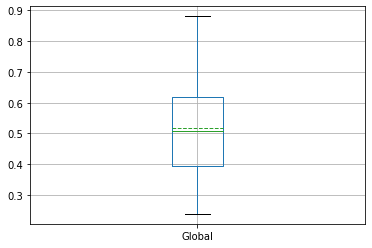

In [14]:
glob.to_frame('Global').boxplot(meanline=True, showmeans=True)

### 2 Combined questions

In [15]:
check_1 = "Lejos"
check_2 = "derecha"
check_3 = "formación"
check_4 = "Far"
check_5 = "Right"
check_6 = "forming"

Q13G = len([i for i in range(len(data)) if ((check_1 in data.Q13[i]) and (check_2 in data.Q13[i]) and (check_3 in data.Q13[i])) or ((check_4 in data.Q13[i]) and (check_5 in data.Q13[i]) and (check_6 in data.Q13[i]))])-2

check_7 = "Cerca"
check_8 = "izquierda"
check_9 = "vieja"
check_10 = "Close"
check_11 = "Left"
check_12 = "Retired"

Q14G = len([i for i in range(len(data)) if ((check_7 in data.Q14[i]) and (check_8 in data.Q14[i]) and (check_9 in data.Q14[i])) or ((check_10 in data.Q14[i]) and (check_11 in data.Q14[i]) and (check_12 in data.Q14[i]))])-2

combined_correct = [Q13G,Q14G]
combined_correct = np.array(combined_correct, int)

combined_correct

array([11, 10])

In [16]:
mean_combined_correct = np.mean(combined_correct)
print("Global success mean (Combined questions):", mean_combined_correct/data_total_responses)
success_combined_correct = np.sum(combined_correct)
attempts_combined_correct = 2* data_total_responses
conf_combined_correct = astropy.stats.binom_conf_interval(success_combined_correct, attempts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_combined_correct) # Correct answers interval

Global success mean (Combined questions): 0.15671641791044777
Jeffreys confidence interval:  [0.1279104  0.19062512]


In [17]:
glob_comb = pd.Series(combined_correct/data_total_responses)
glob_comb.describe()

count    2.000000
mean     0.156716
std      0.010554
min      0.149254
25%      0.152985
50%      0.156716
75%      0.160448
max      0.164179
dtype: float64

<Axes: >

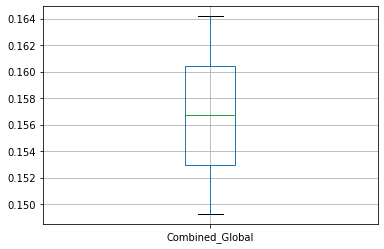

In [18]:
glob_comb.to_frame('Combined_Global').boxplot(meanline=True, showmeans=True)

## Qualitative questions

In [19]:
# Interactivity
Q15G_good = len([i for i in range(len(data)) if (("Buena" in data.Q15[i]) or ("Muy buena" in data.Q15[i]) or ("Good" in data.Q15[i]) or ("Very good" in data.Q15[i]))])
Q15G_acc = len([i for i in range(len(data)) if (("Aceptable" in data.Q15[i]) or ("Acceptable" in data.Q15[i]))])
Q15G_bad = len([i for i in range(len(data)) if (("Mala" in data.Q15[i]) or ("Muy mala" in data.Q15[i]) or ("Bad" in data.Q15[i]) or ("Very bad" in data.Q15[i]))])
Q15G_xxx = len([i for i in range(len(data)) if ("XXX" in data.Q15[i])])
print("Interactivity 'good' or 'very good':", Q15G_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15G_good, data_total_responses - Q15G_xxx))
print("Interactivity 'acceptable':", Q15G_acc)
print("(%)", percentage_sub(Q15G_acc, data_total_responses - Q15G_xxx))
print("Interactivity 'bad' or 'very bad':", Q15G_bad)
print("(%)", percentage_sub(Q15G_bad, data_total_responses - Q15G_xxx))
print("Participants that couldn't test the application in person:", Q15G_xxx)
print("(%)", percentage(Q15G_xxx))

Interactivity 'good' or 'very good': 34
(%) 80.95238095238095
Interactivity 'acceptable': 6
(%) 14.285714285714285
Interactivity 'bad' or 'very bad': 2
(%) 4.761904761904762
Participants that couldn't test the application in person: 25
(%) 37.3134328358209


In [20]:
data_total_responses

67

In [21]:
# Usefulness
Q16G_good = len([i for i in range(len(data)) if (("Útil" in data.Q16[i]) or ("Muy útil" in data.Q16[i]) or ("Useful" in data.Q16[i]) or ("Very useful" in data.Q16[i]))])
Q16G_bad = len([i for i in range(len(data)) if (("dudosa" in data.Q16[i]) or ("Doubtedly" in data.Q16[i]) or ("Doubtely" in data.Q16[i]) or ("Inútil" in data.Q16[i]) or ("Useless" in data.Q16[i]))])
print("Participants finding it 'useful' or 'very useful':", Q16G_good)
print("(%)", percentage(Q16G_good))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16G_bad)
print("(%)", percentage(Q16G_bad))

Participants finding it 'useful' or 'very useful': 53
(%) 79.1044776119403
Participants finding it 'Doubtedly useful' or 'useless': 14
(%) 20.8955223880597


In [22]:
# Quality of sound
Q17G_good = len([i for i in range(len(data)) if (("Buen" in data.Q17[i]) or ("Muy buen" in data.Q17[i]) or ("Good" in data.Q17[i]) or ("Nice" in data.Q17[i]))])
Q17G_acc = len([i for i in range(len(data)) if (("Aceptable" in data.Q17[i]) or ("Acceptable" in data.Q17[i]))])
Q17G_bad = len([i for i in range(len(data)) if (("Mal" in data.Q17[i]) or ("Insoportable" in data.Q17[i]) or ("Bad" in data.Q17[i]) or ("Intolerable" in data.Q17[i]))])
print("Sound Quality 'good' or 'very good':", Q17G_good)
print("(%)", percentage(Q17G_good))
print("Sound Quality 'acceptable':", Q17G_acc)
print("(%)", percentage(Q17G_acc))
print("Sound Quality 'bad' or 'very bad':", Q17G_bad)
print("(%)", percentage(Q17G_bad))

Sound Quality 'good' or 'very good': 39
(%) 58.2089552238806
Sound Quality 'acceptable': 23
(%) 34.32835820895522
Sound Quality 'bad' or 'very bad': 5
(%) 7.462686567164178


## Demographics

In [23]:
Astro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])
Astro_mus_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i])))])
Astro_mus_amt = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Astro_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]))) and not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Astro_amt = len([i for i in range(2,len(data)) if ((("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))) and not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Mus_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]))) and not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i])))])
Mus_amt = len([i for i in range(2,len(data)) if ("amateur" in data.Q19[i]) and not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))])
Non_exp = data_total_responses - Astro_mus_pro - Astro_mus_amt - Astro_pro - Astro_amt - Mus_pro - Mus_amt
BLV = len([i for i in range(2,len(data)) if ("Yes" in data.Q22[i])]) #included within the professional astronomers group
check = Non_exp + Astro_mus_pro + Astro_mus_amt + Astro_pro + Astro_amt + Mus_pro + Mus_amt 
Astro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])
Non_astro = len([i for i in range(2,len(data)) if not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])

print("Total number of participants (check):", check)

print("Number of professional astronomers:", Astro)
print("(%)", percentage(Astro))
print("Number of non professional astronomers:", Non_astro)
print("(%)", percentage(Non_astro))


print("------------------SUBGROUPS----------------------")
print("Number of professional astronomers-musicians:", Astro_mus_pro)
print("(%)", percentage(Astro_mus_pro))
print("Number of professional astronomers-amateur musicians:", Astro_mus_amt)
print("(%)", percentage(Astro_mus_amt))
print("Number of professional astronomers:", Astro_pro)
print("(%)", percentage(Astro_pro))
print("Number of amateur astronomers:", Astro_amt)
print("(%)", percentage(Astro_amt))
print("Number of professional musicians non-astronomers(professional and amateur):", Mus_pro)
print("(%)", percentage(Mus_pro))
print("Number of amateur musicians non-astronomers(professional and amateur):", Mus_amt)
print("(%)", percentage(Mus_amt))
print("Number of non-experienced:", Non_exp)
print("(%)", percentage(Non_exp))
print("Number of BLV participants:", BLV)
print("(%)", percentage(BLV))

Total number of participants (check): 67
Number of professional astronomers: 31
(%) 46.26865671641791
Number of non professional astronomers: 36
(%) 53.73134328358209
------------------SUBGROUPS----------------------
Number of professional astronomers-musicians: 1
(%) 1.4925373134328357
Number of professional astronomers-amateur musicians: 15
(%) 22.388059701492537
Number of professional astronomers: 16
(%) 23.88059701492537
Number of amateur astronomers: 5
(%) 7.462686567164178
Number of professional musicians non-astronomers(professional and amateur): 4
(%) 5.970149253731343
Number of amateur musicians non-astronomers(professional and amateur): 4
(%) 5.970149253731343
Number of non-experienced: 22
(%) 32.83582089552239
Number of BLV participants: 2
(%) 2.9850746268656714


In [24]:
#Participants' age range
Q21G_21 = len([i for i in range(len(data)) if (("Menos" in data.Q21[i]) or ("Under" in data.Q21[i]))])
Q21G_21_30 = len([i for i in range(len(data)) if (("21-30" in data.Q21[i]))])
Q21G_31_40 = len([i for i in range(len(data)) if (("31-40" in data.Q21[i]))])
Q21G_41_50 = len([i for i in range(len(data)) if (("41-50" in data.Q21[i]))])
Q21G_51_60 = len([i for i in range(len(data)) if (("51-60" in data.Q21[i]))])
Q21G_60 = len([i for i in range(len(data)) if (("Más" in data.Q21[i]) or ("Over" in data.Q21[i]))])

print("Number of participants under 21:", Q21G_21)
print("(%)", percentage(Q21G_21))
print("Number of participants between 21 and 30 :", Q21G_21_30)
print("(%)", percentage(Q21G_21_30))
print("Number of participants between 31 and 40 :", Q21G_31_40)
print("(%)", percentage(Q21G_31_40))
print("Number of participants between 41 and 50 :", Q21G_41_50)
print("(%)", percentage(Q21G_41_50))
print("Number of participants between 51 and 60 :", Q21G_51_60)
print("(%)", percentage(Q21G_51_60))
print("Number of participants over 60 :", Q21G_60)
print("(%)", percentage(Q21G_60))

Number of participants under 21: 1
(%) 1.4925373134328357
Number of participants between 21 and 30 : 18
(%) 26.865671641791046
Number of participants between 31 and 40 : 9
(%) 13.432835820895523
Number of participants between 41 and 50 : 21
(%) 31.343283582089555
Number of participants between 51 and 60 : 6
(%) 8.955223880597014
Number of participants over 60 : 10
(%) 14.925373134328357


## Appending Global results

In [25]:
column_list = ["Global", "Astronomers", "Non-astronomers", "Astromus", "AstroNonMus", "MusNonAstro", "Nothing"]
participants_list = []
success_list = []
Jeff_low_list = []
Jeff_high_list = []
std_list = []
comb_success_list = []
comb_Jeff_low_list = []
comb_Jeff_high_list = []
comb_std_list = []
interactivity_list = []
useful_list = []
sound_list = []

In [26]:
participants_list.append(data_total_responses)
success_list.append(glob.describe()["mean"])
Jeff_low_list.append(conf_data_correct[0])
Jeff_high_list.append(conf_data_correct[1])
std_list.append(glob.describe()["std"])
comb_success_list.append(glob_comb.describe()["mean"])
comb_Jeff_low_list.append(conf_combined_correct[0])
comb_Jeff_high_list.append(conf_combined_correct[1])
comb_std_list.append(glob_comb.describe()["std"])
interactivity_list.append(percentage_sub(Q15G_good, data_total_responses - Q15G_xxx))
useful_list.append(percentage(Q16G_good))
sound_list.append(percentage(Q17G_good))

# Experts: Professional astronomers

In [27]:
experts_list = []
experts_index = []
experts_counter = 0
for i in range(len(data)):
    if (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])):
        experts_counter += 1
        current_row = data.iloc[i]
        experts_list.append(current_row)
        experts_index.append(i)
        
print("Number of Professional astronomers:", experts_counter)
experts_df = pd.DataFrame(experts_list)
experts_df

Number of Professional astronomers: 31


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
22,21,21.0,4/25/24 14:36:30,4/25/24 15:03:00,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"jazz, clásica",41-50,No,españa,español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
29,28,28.0,4/29/24 11:22:35,4/29/24 11:31:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Música clásica, latino, pop-rock.",21-30,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
37,36,36.0,5/24/24 1:59:41,5/24/24 4:34:47,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Clásica, Rock, Electrónica, un poco de todo",41-50,No,España,español,"Sí, utilicé auriculares.",Estéreo;,Un trabajo muy interesante. Enhorabuena


In [28]:
Q1E = len([i for i in range(len(experts_df)) if ((experts_df.Q1[experts_index[i]] == data.Q1[0]) or (experts_df.Q1[experts_index[i]] == data.Q1[1]))])
Q2E = len([i for i in range(len(experts_df)) if ((experts_df.Q2[experts_index[i]] == data.Q2[0]) or (experts_df.Q2[experts_index[i]] == data.Q2[1]))])
Q3E = len([i for i in range(len(experts_df)) if ((experts_df.Q3[experts_index[i]] == data.Q3[0]) or (experts_df.Q3[experts_index[i]] == data.Q3[1]))])
Q4E = len([i for i in range(len(experts_df)) if ((experts_df.Q4[experts_index[i]] == data.Q4[0]) or (experts_df.Q4[experts_index[i]] == data.Q4[1]))])
Q5E = len([i for i in range(len(experts_df)) if ((experts_df.Q5[experts_index[i]] == data.Q5[0]) or (experts_df.Q5[experts_index[i]] == data.Q5[1]))])
Q6E = len([i for i in range(len(experts_df)) if ((experts_df.Q6[experts_index[i]] == data.Q6[0]) or (experts_df.Q6[experts_index[i]] == data.Q6[1]))])
Q7E = len([i for i in range(len(experts_df)) if ((experts_df.Q7[experts_index[i]] == data.Q7[0]) or (experts_df.Q7[experts_index[i]] == data.Q7[1]))])
Q8E = len([i for i in range(len(experts_df)) if ((experts_df.Q8[experts_index[i]] == data.Q8[0]) or (experts_df.Q8[experts_index[i]] == data.Q8[1]))])
Q9E = len([i for i in range(len(experts_df)) if ((experts_df.Q9[experts_index[i]] == data.Q9[0]) or (experts_df.Q9[experts_index[i]] == data.Q9[1]))])
Q10E = len([i for i in range(len(experts_df)) if ((experts_df.Q10[experts_index[i]] == data.Q10[0]) or (experts_df.Q10[experts_index[i]] == data.Q10[1]))])
Q11E = len([i for i in range(len(experts_df)) if ((experts_df.Q11[experts_index[i]] == data.Q11[0]) or (experts_df.Q11[experts_index[i]] == data.Q11[1]))])
Q12E = len([i for i in range(len(experts_df)) if ((experts_df.Q12[experts_index[i]] == data.Q12[0]) or (experts_df.Q12[experts_index[i]] == data.Q12[1]))])

experts_correct = [Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,Q11E,Q12E]
experts_correct = np.array(experts_correct, int)
experts_correct #12 Single response correct results

array([16, 28, 11, 14, 22, 21, 17, 24, 17,  7, 13, 16])

In [29]:
experts_total_responses = len(experts_df)
mean_experts_correct = np.mean(experts_correct)
print("Total responses: ", experts_total_responses)
print("Professional astronomers success mean:", mean_experts_correct/experts_total_responses)

success_experts_correct = np.sum(experts_correct)
attempts_experts_correct = 12* experts_total_responses
conf_experts_correct = astropy.stats.binom_conf_interval(success_experts_correct, attempts_experts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_correct) # Correct answers interval

Total responses:  31
Professional astronomers success mean: 0.5537634408602151
Jeffreys confidence interval:  [0.52787996 0.57935834]


In [30]:
experts = pd.Series(experts_correct/experts_total_responses)
experts.describe()

count    12.000000
mean      0.553763
std       0.188011
min       0.225806
25%       0.443548
50%       0.532258
75%       0.685484
max       0.903226
dtype: float64

In [31]:
Q13E = len([i for i in range(len(experts_df)) if ((check_1 in experts_df.Q13[experts_index[i]]) and (check_2 in experts_df.Q13[experts_index[i]]) and (check_3 in experts_df.Q13[experts_index[i]])) or ((check_4 in experts_df.Q13[experts_index[i]]) and (check_5 in experts_df.Q13[experts_index[i]]) and (check_6 in experts_df.Q13[experts_index[i]]))])
Q14E = len([i for i in range(len(experts_df)) if ((check_7 in experts_df.Q14[experts_index[i]]) and (check_8 in experts_df.Q14[experts_index[i]]) and (check_9 in experts_df.Q14[experts_index[i]])) or ((check_10 in experts_df.Q14[experts_index[i]]) and (check_11 in experts_df.Q14[experts_index[i]]) and (check_12 in experts_df.Q14[experts_index[i]]))])

experts_combined_correct = [Q13E,Q14E]
experts_combined_correct = np.array(experts_combined_correct, int)

experts_combined_correct

array([7, 2])

In [32]:
mean_experts_combined_correct = np.mean(experts_combined_correct)
print("Professional astronomers success mean (Combined questions):", mean_experts_combined_correct/experts_total_responses)
success_experts_combined_correct = np.sum(experts_combined_correct)
attempts_experts_combined_correct = 2* experts_total_responses
conf_experts_combined_correct = astropy.stats.binom_conf_interval(success_experts_combined_correct, attempts_experts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_combined_correct) # Correct answers interval

Professional astronomers success mean (Combined questions): 0.14516129032258066
Jeffreys confidence interval:  [0.10621113 0.19545766]


In [33]:
experts_combined = pd.Series(experts_combined_correct/experts_total_responses)
experts_combined.describe()

count    2.000000
mean     0.145161
std      0.114049
min      0.064516
25%      0.104839
50%      0.145161
75%      0.185484
max      0.225806
dtype: float64

## Qualitative

In [34]:
# Interactivity
Q15E_good = len([i for i in range(len(experts_df)) if (("Buena" in experts_df.Q15[experts_index[i]]) or ("Muy buena" in experts_df.Q15[experts_index[i]]) or ("Good" in experts_df.Q15[experts_index[i]]) or ("Very good" in experts_df.Q15[experts_index[i]]))])
Q15E_acc = len([i for i in range(len(experts_df)) if (("Aceptable" in experts_df.Q15[experts_index[i]]) or ("Acceptable" in experts_df.Q15[experts_index[i]]))])
Q15E_bad = len([i for i in range(len(experts_df)) if (("Mala" in experts_df.Q15[experts_index[i]]) or ("Muy mala" in experts_df.Q15[experts_index[i]]) or ("Bad" in experts_df.Q15[experts_index[i]]) or ("Very bad" in experts_df.Q15[experts_index[i]]))])
Q15E_xxx = len([i for i in range(len(experts_df)) if (("XXX" in experts_df.Q15[experts_index[i]]))])
print("Interactivity 'good' or 'very good':", Q15E_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15E_good, experts_counter - Q15E_xxx))
print("Interactivity 'acceptable':", Q15E_acc)
print("(%)", percentage_sub(Q15E_acc, experts_counter - Q15E_xxx))
print("Interactivity 'bad' or 'very bad':", Q15E_bad)
print("(%)", percentage_sub(Q15E_bad, experts_counter - Q15E_xxx))
print("Participants that couldn't test the application in person:", Q15E_xxx)
print("(%)", percentage_sub(Q15E_xxx, experts_counter))

Interactivity 'good' or 'very good': 16
(%) 76.19047619047619
Interactivity 'acceptable': 3
(%) 14.285714285714285
Interactivity 'bad' or 'very bad': 2
(%) 9.523809523809524
Participants that couldn't test the application in person: 10
(%) 32.25806451612903


In [35]:
# Usefulness
Q16E_good = len([i for i in range(len(experts_df)) if (("Útil" in experts_df.Q16[experts_index[i]]) or ("Muy útil" in experts_df.Q16[experts_index[i]]) or ("Useful" in experts_df.Q16[experts_index[i]]) or ("Very useful" in experts_df.Q16[experts_index[i]]))])
Q16E_bad = len([i for i in range(len(experts_df)) if (("dudosa" in experts_df.Q16[experts_index[i]]) or ("Doubtedly" in experts_df.Q16[experts_index[i]]) or ("Doubtely" in experts_df.Q16[experts_index[i]]) or ("Inútil" in experts_df.Q16[experts_index[i]]) or ("Useless" in experts_df.Q16[experts_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16E_good)
print("(%)", percentage_sub(Q16E_good, experts_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16E_bad)
print("(%)", percentage_sub(Q16E_bad, experts_counter))

Participants finding it 'useful' or 'very useful': 23
(%) 74.19354838709677
Participants finding it 'Doubtedly useful' or 'useless': 8
(%) 25.806451612903224


In [36]:
# Quality of sound
Q17E_good = len([i for i in range(len(experts_df)) if (("Buen" in experts_df.Q17[experts_index[i]]) or ("Muy buen" in experts_df.Q17[experts_index[i]]) or ("Good" in experts_df.Q17[experts_index[i]]) or ("Nice" in experts_df.Q17[experts_index[i]]))])
Q17E_acc = len([i for i in range(len(experts_df)) if (("Aceptable" in experts_df.Q17[experts_index[i]]) or ("Acceptable" in experts_df.Q17[experts_index[i]]))])
Q17E_bad = len([i for i in range(len(experts_df)) if (("Mal" in experts_df.Q17[experts_index[i]]) or ("Insoportable" in experts_df.Q17[experts_index[i]]) or ("Bad" in experts_df.Q17[experts_index[i]]) or ("Intolerable" in experts_df.Q17[experts_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17E_good)
print("(%)", percentage_sub(Q17E_good, experts_counter))
print("Sound Quality 'acceptable':", Q17E_acc)
print("(%)", percentage(Q17E_acc))
print("Sound Quality 'bad' or 'very bad':", Q17E_bad)
print("(%)", percentage_sub(Q17E_bad, experts_counter))

Sound Quality 'good' or 'very good': 16
(%) 51.61290322580645
Sound Quality 'acceptable': 12
(%) 17.91044776119403
Sound Quality 'bad' or 'very bad': 3
(%) 9.67741935483871


## Appending results

In [37]:
participants_list.append(experts_counter)
success_list.append(experts.describe()["mean"])
Jeff_low_list.append(conf_experts_correct[0])
Jeff_high_list.append(conf_experts_correct[1])
std_list.append(experts.describe()["std"])
comb_success_list.append(experts_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_experts_combined_correct[0])
comb_Jeff_high_list.append(conf_experts_combined_correct[1])
comb_std_list.append(experts_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15E_good, experts_counter - Q15E_xxx))
useful_list.append(percentage_sub(Q16E_good, experts_counter))
sound_list.append(percentage_sub(Q17E_good, experts_counter))

# Non experts. Non-professional astronomers

In [38]:
nonExperts_list = []
nonExperts_index = []
nonExperts_counter = 0
for i in range(2,len(data)):
    if not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])):
        nonExperts_counter += 1
        current_row = data.iloc[i]
        nonExperts_list.append(current_row)
        nonExperts_index.append(i)
        
print("Number of Non-professional astronomers:", nonExperts_counter)
nonExperts_df = pd.DataFrame(nonExperts_list)
nonExperts_df

Number of Non-professional astronomers: 36


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
6,5,5.0,4/18/24 21:15:36,4/18/24 21:19:42,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,Música del mundo,Más de 60,No,Canada,español,"Sí, utilicé auriculares.",Estéreo;,muy interesante
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
8,7,7.0,4/18/24 21:09:34,4/18/24 21:41:59,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Clasica,Más de 60,No,España,Española,"Sí, utilicé auriculares.",No lo sé.;Estéreo;,x-x
9,8,8.0,4/18/24 21:31:33,4/18/24 21:43:57,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Ninguna,Clásica,51-60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
12,11,11.0,4/19/24 10:07:08,4/19/24 10:14:43,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Boleros,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x


### Random downsampling

In [39]:
nonExperts_down = nonExperts_df.sample(frac=0.85, replace=False, random_state=1)
nonExperts_down

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
57,56,11.0,6/26/24 6:39:03,6/26/24 7:09:03,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Some experienced (hobby/enthusiast),Some experienced (hobby/enthusiast),Alternative rock & Japanese pop,31-40,No,Japan,Chinese,"Yes, I used headphones",I don't know;,I am not sure the use of this tool. It is not...
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
52,51,6.0,5/27/24 2:29:28,5/27/24 2:57:48,anonymous,Sonification 2,Left,Sonification 3,Sonification 2,Spectrum 1,...,No experienced,Not experienced,Jazz and Pops,41-50,No,Japan,Japanese,"Yes, I used headphones",Stereo;,The age of the stellar was rather difficult fo...
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
27,26,26.0,4/26/24 19:53:36,4/27/24 0:52:27,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Muy básica,Jazz,41-50,No,España,Mallorquín,"Sí, utilicé auriculares.",Estéreo;,x-x
25,24,24.0,4/26/24 19:24:11,4/26/24 19:40:14,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,Electrónica,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
30,29,29.0,4/30/24 11:11:36,4/30/24 11:37:53,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Mucha experiencia (professional),"Rock psicodelico, Jazz, Reggae, Electronica",31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Intra-aurales;,x-x
33,32,32.0,5/3/24 12:31:43,5/3/24 13:15:07,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Experimental,31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
54,53,8.0,6/23/24 15:32:58,6/23/24 16:18:51,anonymous,Sonification 1,Left,Sonification 2,Sonification 1,Spectrum 3,...,Some experienced (hobby/enthusiast),Very basic experience,popular songs,21-30,No,中国,中文,"Yes, I used headphones",Stereo;,x-x
38,37,37.0,5/25/24 11:00:56,5/25/24 11:10:50,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Mucha experiencia (professional),Todo tipo de música,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x


In [40]:
len(nonExperts_down)

31

In [41]:
nonExperts_index2 = []
for i in range(len(nonExperts_down)):
    nonExperts_index2.append(nonExperts_down.index[i])
nonExperts_index2

[57,
 64,
 52,
 7,
 27,
 25,
 30,
 33,
 54,
 38,
 47,
 63,
 34,
 36,
 8,
 6,
 19,
 14,
 61,
 31,
 60,
 28,
 26,
 10,
 18,
 11,
 65,
 4,
 24,
 3,
 23]

In [42]:
Q1nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[0]) or (nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[1]))])
Q2nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[0]) or (nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[1]))])
Q3nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[0]) or (nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[1]))])
Q4nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[0]) or (nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[1]))])
Q5nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[0]) or (nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[1]))])
Q6nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[0]) or (nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[1]))])
Q7nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[0]) or (nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[1]))])
Q8nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[0]) or (nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[1]))])
Q9nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[0]) or (nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[1]))])
Q10nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[0]) or (nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[1]))])
Q11nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[0]) or (nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[1]))])
Q12nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[0]) or (nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[1]))])

nonExperts_correct = [Q1nE,Q2nE,Q3nE,Q4nE,Q5nE,Q6nE,Q7nE,Q8nE,Q9nE,Q10nE,Q11nE,Q12nE]
nonExperts_correct = np.array(nonExperts_correct, int)
nonExperts_correct #12 Single response correct results

array([12, 26, 11,  9, 17, 21, 16, 19, 14,  7, 13, 14])

In [43]:
nonExperts_total_responses = len(nonExperts_down)
mean_nonExperts_correct = np.mean(nonExperts_correct)
print("Total responses: ", nonExperts_total_responses)
print("Non-professional astronomers success mean:", mean_nonExperts_correct/nonExperts_total_responses)

success_nonExperts_correct = np.sum(nonExperts_correct)
attempts_nonExperts_correct = 12* nonExperts_total_responses
conf_nonExperts_correct = astropy.stats.binom_conf_interval(success_nonExperts_correct, attempts_nonExperts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_correct) # Correct answers interval

Total responses:  31
Non-professional astronomers success mean: 0.4811827956989247
Jeffreys confidence interval:  [0.45536258 0.50710401]


In [44]:
nonExperts = pd.Series(nonExperts_correct/nonExperts_total_responses)
nonExperts.describe()

count    12.000000
mean      0.481183
std       0.170947
min       0.225806
25%       0.379032
50%       0.451613
75%       0.564516
max       0.838710
dtype: float64

In [45]:
Q13nE = len([i for i in range(len(nonExperts_down)) if ((check_1 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_2 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_3 in nonExperts_down.Q13[nonExperts_index2[i]])) or ((check_4 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_5 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_6 in nonExperts_down.Q13[nonExperts_index2[i]]))])

Q14nE = len([i for i in range(len(nonExperts_down)) if ((check_7 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_8 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_9 in nonExperts_down.Q14[nonExperts_index2[i]])) or ((check_10 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_11 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_12 in nonExperts_down.Q14[nonExperts_index2[i]]))])

nonExperts_combined_correct = [Q13nE,Q14nE]
nonExperts_combined_correct = np.array(nonExperts_combined_correct, int)

nonExperts_combined_correct

array([4, 8])

In [46]:
mean_nonExperts_combined_correct = np.mean(nonExperts_combined_correct)
print("Non-professional astronomers success mean (Combined questions):", mean_nonExperts_combined_correct/nonExperts_total_responses)
success_nonExperts_combined_correct = np.sum(nonExperts_combined_correct)
attempts_nonExperts_combined_correct = 2* nonExperts_total_responses
conf_nonExperts_combined_correct = astropy.stats.binom_conf_interval(success_nonExperts_combined_correct, attempts_nonExperts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_combined_correct) # Correct answers interval

Non-professional astronomers success mean (Combined questions): 0.1935483870967742
Jeffreys confidence interval:  [0.14851068 0.24838159]


In [47]:
nonExperts_combined = pd.Series(nonExperts_combined_correct/nonExperts_total_responses)
nonExperts_combined.describe()

count    2.000000
mean     0.193548
std      0.091240
min      0.129032
25%      0.161290
50%      0.193548
75%      0.225806
max      0.258065
dtype: float64

## Qualitative

In [48]:
# Interactivity
Q15nE_good = len([i for i in range(len(nonExperts_down)) if (("Buena" in nonExperts_down.Q15[nonExperts_index2[i]]) or ("Muy buena" in nonExperts_down.Q15[nonExperts_index2[i]]) or ("Good" in nonExperts_down.Q15[nonExperts_index2[i]]) or ("Very good" in nonExperts_down.Q15[nonExperts_index2[i]]))])
Q15nE_acc = len([i for i in range(len(nonExperts_down)) if (("Aceptable" in nonExperts_down.Q15[nonExperts_index2[i]]) or ("Acceptable" in nonExperts_down.Q15[nonExperts_index2[i]]))])
Q15nE_bad = len([i for i in range(len(nonExperts_down)) if (("Mala" in nonExperts_down.Q15[nonExperts_index2[i]]) or ("Muy mala" in nonExperts_down.Q15[nonExperts_index2[i]]) or ("Bad" in nonExperts_down.Q15[nonExperts_index2[i]]) or ("Very bad" in nonExperts_down.Q15[nonExperts_index2[i]]))])
Q15nE_xxx = len([i for i in range(len(nonExperts_down)) if ("XXX" in nonExperts_down.Q15[nonExperts_index2[i]])])
print("Interactivity 'good' or 'very good':", Q15nE_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15nE_good, len(nonExperts_down) - Q15nE_xxx))
print("Interactivity 'acceptable':", Q15nE_acc)
print("(%)", percentage_sub(Q15nE_acc, len(nonExperts_down) - Q15nE_xxx))
print("Interactivity 'bad' or 'very bad':", Q15nE_bad)
print("(%)", percentage_sub(Q15nE_bad, len(nonExperts_down) - Q15nE_xxx))
print("Participants that couldn't test the application in person:", Q15nE_xxx)
print("(%)", percentage_sub(Q15nE_xxx, len(nonExperts_down)))

Interactivity 'good' or 'very good': 14
(%) 82.35294117647058
Interactivity 'acceptable': 3
(%) 17.647058823529413
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 14
(%) 45.16129032258064


In [49]:
# Usefulness
Q16nE_good = len([i for i in range(len(nonExperts_down)) if (("Útil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Muy útil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Useful" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Very useful" in nonExperts_down.Q16[nonExperts_index2[i]]))])
Q16nE_bad = len([i for i in range(len(nonExperts_down)) if (("dudosa" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Doubtedly" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Doubtely" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Inútil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Useless" in nonExperts_down.Q16[nonExperts_index2[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16nE_good)
print("(%)", percentage_sub(Q16nE_good, len(nonExperts_down)))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16nE_bad)
print("(%)", percentage_sub(Q16nE_bad, len(nonExperts_down)))

Participants finding it 'useful' or 'very useful': 25
(%) 80.64516129032258
Participants finding it 'Doubtedly useful' or 'useless': 6
(%) 19.35483870967742


In [50]:
# Quality of sound
Q17nE_good = len([i for i in range(len(nonExperts_down)) if (("Buen" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Muy buen" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Good" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Nice" in nonExperts_down.Q17[nonExperts_index2[i]]))])
Q17nE_acc = len([i for i in range(len(nonExperts_down)) if (("Aceptable" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Acceptable" in nonExperts_down.Q17[nonExperts_index2[i]]))])
Q17nE_bad = len([i for i in range(len(nonExperts_down)) if (("Mal" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Insoportable" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Bad" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Intolerable" in nonExperts_down.Q17[nonExperts_index2[i]]))])
print("Sound Quality 'good' or 'very good':", Q17nE_good)
print("(%)", percentage_sub(Q17nE_good, len(nonExperts_down)))
print("Sound Quality 'acceptable':", Q17nE_acc)
print("(%)", percentage_sub(Q17nE_acc, len(nonExperts_down)))
print("Sound Quality 'bad' or 'very bad':", Q17nE_bad)
print("(%)", percentage_sub(Q17nE_bad, len(nonExperts_down)))

Sound Quality 'good' or 'very good': 20
(%) 64.51612903225806
Sound Quality 'acceptable': 9
(%) 29.03225806451613
Sound Quality 'bad' or 'very bad': 2
(%) 6.451612903225806


## Appending results

In [51]:
participants_list.append(len(nonExperts_down))
success_list.append(nonExperts.describe()["mean"])
Jeff_low_list.append(conf_nonExperts_correct[0])
Jeff_high_list.append(conf_nonExperts_correct[1])
std_list.append(nonExperts.describe()["std"])
comb_success_list.append(nonExperts_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_nonExperts_combined_correct[0])
comb_Jeff_high_list.append(conf_nonExperts_combined_correct[1])
comb_std_list.append(nonExperts_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15nE_good, len(nonExperts_down) - Q15nE_xxx))
useful_list.append(percentage_sub(Q16nE_good, len(nonExperts_down)))
sound_list.append(percentage_sub(Q17nE_good, len(nonExperts_down)))

## SUBGROUPS. Professional astronomers - professional & amateur musicians

In [52]:
astromus_list = []
astromus_index = []
astromus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]))):
        astromus_counter += 1
        current_row = data.iloc[i]
        astromus_list.append(current_row)
        astromus_index.append(i)
        
print("Number of Professional astronomers - professional & amateur musicians:", astromus_counter)
astromus_df = pd.DataFrame(astromus_list)
astromus_df

Number of Professional astronomers - professional & amateur musicians: 11


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
39,38,38.0,5/26/24 21:53:07,5/26/24 22:10:15,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
46,45,5.0,4/27/24 10:16:07,4/27/24 10:37:46,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;Estéreo;,x-x
49,48,3.0,4/26/24 4:40:27,4/26/24 5:03:39,anonymous,Sonification 1,Right,Sonification 2,Sonification 1,Spectrum 2,...,Very experienced (professional),Experienced (amateur),"Rock, folk, jazz",31-40,No,Spain,Greek,"Yes, I used headphones",Intra-aural;,The localization was not very easy to distinct...
50,49,4.0,5/2/24 17:18:28,5/2/24 17:35:06,anonymous,Sonification 1,Left,Sonification 2,Sonification 4,Spectrum 2,...,Very experienced (professional),Experienced (amateur),"classical, indie",41-50,No,Canada,Swedish,"Yes, I used headphones",Intra-aural;I don't know;,"It was fairly easy in the beginning, but I had..."
53,52,7.0,6/1/24 10:16:23,6/1/24 10:29:00,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Classical but also rock,41-50,No,Germany,Spanish,"Yes, I used headphones",Stereo;,x-x
62,61,16.0,7/18/24 16:24:37,7/18/24 16:39:13,anonymous,Sonification 1,Left,Sonification 3,Sonification 2,Spectrum 3,...,Very experienced (professional),Very experienced (professional),"Electronic Music, Jazz, Classical, Folk, Rock",41-50,No,Malta,English,"Yes, I used headphones",Stereo;,x-x
67,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [53]:
astromus_df.Q1[astromus_index[0]]

'Sonificación 1'

In [54]:
Q1AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q1[astromus_index[i]] == data.Q1[0]) or (astromus_df.Q1[astromus_index[i]] == data.Q1[1]))])
Q2AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q2[astromus_index[i]] == data.Q2[0]) or (astromus_df.Q2[astromus_index[i]] == data.Q2[1]))])
Q3AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q3[astromus_index[i]] == data.Q3[0]) or (astromus_df.Q3[astromus_index[i]] == data.Q3[1]))])
Q4AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q4[astromus_index[i]] == data.Q4[0]) or (astromus_df.Q4[astromus_index[i]] == data.Q4[1]))])
Q5AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q5[astromus_index[i]] == data.Q5[0]) or (astromus_df.Q5[astromus_index[i]] == data.Q5[1]))])
Q6AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q6[astromus_index[i]] == data.Q6[0]) or (astromus_df.Q6[astromus_index[i]] == data.Q6[1]))])
Q7AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q7[astromus_index[i]] == data.Q7[0]) or (astromus_df.Q7[astromus_index[i]] == data.Q7[1]))])
Q8AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q8[astromus_index[i]] == data.Q8[0]) or (astromus_df.Q8[astromus_index[i]] == data.Q8[1]))])
Q9AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q9[astromus_index[i]] == data.Q9[0]) or (astromus_df.Q9[astromus_index[i]] == data.Q9[1]))])
Q10AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q10[astromus_index[i]] == data.Q10[0]) or (astromus_df.Q10[astromus_index[i]] == data.Q10[1]))])
Q11AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q11[astromus_index[i]] == data.Q11[0]) or (astromus_df.Q11[astromus_index[i]] == data.Q11[1]))])
Q12AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q12[astromus_index[i]] == data.Q12[0]) or (astromus_df.Q12[astromus_index[i]] == data.Q12[1]))])

astromus_correct = [Q1AM,Q2AM,Q3AM,Q4AM,Q5AM,Q6AM,Q7AM,Q8AM,Q9AM,Q10AM,Q11AM,Q12AM]
astromus_correct = np.array(astromus_correct, int)
astromus_correct #12 Single response correct results

array([7, 8, 2, 5, 8, 8, 8, 9, 6, 1, 5, 5])

In [55]:
astromus_total_responses = len(astromus_df)
mean_astromus_correct = np.mean(astromus_correct)
print("Total responses: ", astromus_total_responses)
print("Professional astronomers - amateur musicians success mean:", mean_astromus_correct/astromus_total_responses)

success_astromus_correct = np.sum(astromus_correct)
attempts_astromus_correct = 12* astromus_total_responses
conf_astromus_correct = astropy.stats.binom_conf_interval(success_astromus_correct, attempts_astromus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_correct) # Correct answers interval

Total responses:  11
Professional astronomers - amateur musicians success mean: 0.5454545454545454
Jeffreys confidence interval:  [0.50193513 0.58828837]


In [56]:
astromus = pd.Series(astromus_correct/astromus_total_responses)
astromus.describe()

count    12.000000
mean      0.545455
std       0.229330
min       0.090909
25%       0.454545
50%       0.590909
75%       0.727273
max       0.818182
dtype: float64

In [57]:
Q13AM = len([i for i in range(len(astromus_df)) if ((check_1 in astromus_df.Q13[astromus_index[i]]) and (check_2 in astromus_df.Q13[astromus_index[i]]) and (check_3 in astromus_df.Q13[astromus_index[i]])) or ((check_4 in astromus_df.Q13[astromus_index[i]]) and (check_5 in astromus_df.Q13[astromus_index[i]]) and (check_6 in astromus_df.Q13[astromus_index[i]]))])

Q14AM = len([i for i in range(len(astromus_df)) if ((check_7 in astromus_df.Q14[astromus_index[i]]) and (check_8 in astromus_df.Q14[astromus_index[i]]) and (check_9 in astromus_df.Q14[astromus_index[i]])) or ((check_10 in astromus_df.Q14[astromus_index[i]]) and (check_11 in astromus_df.Q14[astromus_index[i]]) and (check_12 in astromus_df.Q14[astromus_index[i]]))])

astromus_combined_correct = [Q13AM,Q14AM]
astromus_combined_correct = np.array(astromus_combined_correct, int)

astromus_combined_correct

array([2, 1])

In [58]:
mean_astromus_combined_correct = np.mean(astromus_combined_correct)
print("Professional astronomers - professional & amateur musicians success mean (Combined questions):", mean_astromus_combined_correct/astromus_total_responses)
success_astromus_combined_correct = np.sum(astromus_combined_correct)
attempts_astromus_combined_correct = 2* astromus_total_responses
conf_astromus_combined_correct = astropy.stats.binom_conf_interval(success_astromus_combined_correct, attempts_astromus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_combined_correct) # Correct answers interval

Professional astronomers - professional & amateur musicians success mean (Combined questions): 0.13636363636363635
Jeffreys confidence interval:  [0.07970543 0.22526205]


In [59]:
astromus_combined = pd.Series(astromus_combined_correct/astromus_total_responses)
astromus_combined.describe()

count    2.000000
mean     0.136364
std      0.064282
min      0.090909
25%      0.113636
50%      0.136364
75%      0.159091
max      0.181818
dtype: float64

## Qualitative

In [60]:
# Interactivity
Q15AM_good = len([i for i in range(len(astromus_df)) if (("Buena" in astromus_df.Q15[astromus_index[i]]) or ("Muy buena" in astromus_df.Q15[astromus_index[i]]) or ("Good" in astromus_df.Q15[astromus_index[i]]) or ("Very good" in astromus_df.Q15[astromus_index[i]]))])
Q15AM_acc = len([i for i in range(len(astromus_df)) if (("Aceptable" in astromus_df.Q15[astromus_index[i]]) or ("Acceptable" in astromus_df.Q15[astromus_index[i]]))])
Q15AM_bad = len([i for i in range(len(astromus_df)) if (("Mala" in astromus_df.Q15[astromus_index[i]]) or ("Muy mala" in astromus_df.Q15[astromus_index[i]]) or ("Bad" in astromus_df.Q15[astromus_index[i]]) or ("Very bad" in astromus_df.Q15[astromus_index[i]]))])
Q15AM_xxx = len([i for i in range(len(astromus_df)) if ("XXX" in astromus_df.Q15[astromus_index[i]])])
print("Interactivity 'good' or 'very good':", Q15AM_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15AM_good, astromus_counter - Q15AM_xxx))
print("Interactivity 'acceptable':", Q15AM_acc)
print("(%)", percentage_sub(Q15AM_acc, astromus_counter - Q15AM_xxx))
print("Interactivity 'bad' or 'very bad':", Q15AM_bad)
print("(%)", percentage_sub(Q15AM_bad, astromus_counter - Q15AM_xxx))
print("Participants that couldn't test the application in person:", Q15AM_xxx)
print("(%)", percentage_sub(Q15AM_xxx, astromus_counter))

Interactivity 'good' or 'very good': 6
(%) 75.0
Interactivity 'acceptable': 2
(%) 25.0
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 3
(%) 27.27272727272727


In [61]:
# Usefulness
Q16AM_good = len([i for i in range(len(astromus_df)) if (("Útil" in astromus_df.Q16[astromus_index[i]]) or ("Muy útil" in astromus_df.Q16[astromus_index[i]]) or ("Useful" in astromus_df.Q16[astromus_index[i]]) or ("Very useful" in astromus_df.Q16[astromus_index[i]]))])
Q16AM_bad = len([i for i in range(len(astromus_df)) if (("dudosa" in astromus_df.Q16[astromus_index[i]]) or ("Doubtedly" in astromus_df.Q16[astromus_index[i]]) or ("Doubtely" in astromus_df.Q16[astromus_index[i]]) or ("Inútil" in astromus_df.Q16[astromus_index[i]]) or ("Useless" in astromus_df.Q16[astromus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16AM_good)
print("(%)", percentage_sub(Q16AM_good, astromus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16AM_bad)
print("(%)", percentage_sub(Q16AM_bad, astromus_counter))

Participants finding it 'useful' or 'very useful': 7
(%) 63.63636363636363
Participants finding it 'Doubtedly useful' or 'useless': 4
(%) 36.36363636363637


In [62]:
# Quality of sound
Q17AM_good = len([i for i in range(len(astromus_df)) if (("Buen" in astromus_df.Q17[astromus_index[i]]) or ("Muy buen" in astromus_df.Q17[astromus_index[i]]) or ("Good" in astromus_df.Q17[astromus_index[i]]) or ("Nice" in astromus_df.Q17[astromus_index[i]]))])
Q17AM_acc = len([i for i in range(len(astromus_df)) if (("Aceptable" in astromus_df.Q17[astromus_index[i]]) or ("Acceptable" in astromus_df.Q17[astromus_index[i]]))])
Q17AM_bad = len([i for i in range(len(astromus_df)) if (("Mal" in astromus_df.Q17[astromus_index[i]]) or ("Insoportable" in astromus_df.Q17[astromus_index[i]]) or ("Bad" in astromus_df.Q17[astromus_index[i]]) or ("Intolerable" in astromus_df.Q17[astromus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17AM_good)
print("(%)", percentage_sub(Q17AM_good, astromus_counter))
print("Sound Quality 'acceptable':", Q17AM_acc)
print("(%)", percentage_sub(Q17AM_acc, astromus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17AM_bad)
print("(%)", percentage_sub(Q17AM_bad, astromus_counter))

Sound Quality 'good' or 'very good': 5
(%) 45.45454545454545
Sound Quality 'acceptable': 4
(%) 36.36363636363637
Sound Quality 'bad' or 'very bad': 2
(%) 18.181818181818183


## Appending results

In [63]:
participants_list.append(astromus_counter)
success_list.append(astromus.describe()["mean"])
Jeff_low_list.append(conf_astromus_correct[0])
Jeff_high_list.append(conf_astromus_correct[1])
std_list.append(astromus.describe()["std"])
comb_success_list.append(astromus_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_astromus_combined_correct[0])
comb_Jeff_high_list.append(conf_astromus_combined_correct[1])
comb_std_list.append(astromus_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15AM_good, astromus_counter - Q15AM_xxx))
useful_list.append(percentage_sub(Q16AM_good, astromus_counter))
sound_list.append(percentage_sub(Q17AM_good, astromus_counter))

## SUBGROUPS. Astronomers non-musicians

In [64]:
astro_nonmus_list = []
astro_nonmus_index = []
astro_nonmus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and not (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i]))):
        astro_nonmus_counter += 1
        current_row = data.iloc[i]
        astro_nonmus_list.append(current_row)
        astro_nonmus_index.append(i)
        
print("Number of Professional astronomers non-musicians:", astro_nonmus_counter)
astro_nonmus_df = pd.DataFrame(astro_nonmus_list)
astro_nonmus_df

Number of Professional astronomers non-musicians: 13


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
40,39,39.0,6/14/24 12:39:07,6/14/24 19:32:03,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Mucha experiencia (profesional),Muy básica,Rock,41-50,No,España,italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
42,41,1.0,4/25/24 9:19:19,4/25/24 9:23:16,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 3,...,Mucha experiencia (profesional),Muy básica,Toda,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
44,43,3.0,4/25/24 11:55:21,4/25/24 12:18:21,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Rock suave, reggae, hip-hop, flamenco",21-30,No,España,"Euskara, Castellano","Sí, utilicé auriculares.",Audio 3D / Gaming;,Me hubiese ayudado una explicación más detalla...
45,44,4.0,4/26/24 23:27:16,4/27/24 0:15:56,anonymous,Sonificación 2,A la izquierda,Sonificación 1,Sonificación 4,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
48,47,2.0,4/17/24 11:32:00,4/17/24 12:09:06,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 1,...,Very experienced (professional),Not experienced,"Rock, trash, grunge, metal",31-40,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
55,54,9.0,6/24/24 16:27:17,6/24/24 16:46:13,anonymous,Sonification 2,Left,Sonification 4,Sonification 2,Spectrum 2,...,Very experienced (professional),Very basic experience,rock,21-30,No,China,Chinese,"No, I didn't",I don't know;,x-x


In [65]:
Q1ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[0]) or (astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[1]))])
Q2ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[0]) or (astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[1]))])
Q3ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[0]) or (astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[1]))])
Q4ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[0]) or (astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[1]))])
Q5ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[0]) or (astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[1]))])
Q6ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[0]) or (astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[1]))])
Q7ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[0]) or (astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[1]))])
Q8ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[0]) or (astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[1]))])
Q9ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[0]) or (astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[1]))])
Q10ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[0]) or (astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[1]))])
Q11ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[0]) or (astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[1]))])
Q12ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[0]) or (astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[1]))])

astro_nonmus_correct = [Q1ANM,Q2ANM,Q3ANM,Q4ANM,Q5ANM,Q6ANM,Q7ANM,Q8ANM,Q9ANM,Q10ANM,Q11ANM,Q12ANM]
astro_nonmus_correct = np.array(astro_nonmus_correct, int)
astro_nonmus_correct #12 Single response correct results

array([ 7, 13,  5,  5,  8,  9,  6, 11,  6,  6,  7,  7])

In [66]:
astro_nonmus_total_responses = len(astro_nonmus_df)
mean_astro_nonmus_correct = np.mean(astro_nonmus_correct)
print("Total responses: ", astro_nonmus_total_responses)
print("Professional astronomers non-musicians success mean:", mean_astro_nonmus_correct/astro_nonmus_total_responses)

success_astro_nonmus_correct = np.sum(astro_nonmus_correct)
attempts_astro_nonmus_correct = 12* astro_nonmus_total_responses
conf_astro_nonmus_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_correct, attempts_astro_nonmus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_correct) # Correct answers interval

Total responses:  13
Professional astronomers non-musicians success mean: 0.5769230769230769
Jeffreys confidence interval:  [0.53700071 0.61586303]


In [67]:
astro_nonmus = pd.Series(astro_nonmus_correct/astro_nonmus_total_responses)
astro_nonmus.describe()

count    12.000000
mean      0.576923
std       0.186989
min       0.384615
25%       0.461538
50%       0.538462
75%       0.634615
max       1.000000
dtype: float64

In [68]:
Q13ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_1 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_2 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_3 in astro_nonmus_df.Q13[astro_nonmus_index[i]])) or ((check_4 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_5 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_6 in astro_nonmus_df.Q13[astro_nonmus_index[i]]))])

Q14ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_7 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_8 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_9 in astro_nonmus_df.Q14[astro_nonmus_index[i]])) or ((check_10 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_11 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_12 in astro_nonmus_df.Q14[astro_nonmus_index[i]]))])

astro_nonmus_combined_correct = [Q13ANM,Q14ANM]
astro_nonmus_combined_correct = np.array(astro_nonmus_combined_correct, int)

astro_nonmus_combined_correct

array([2, 1])

In [69]:
mean_astro_nonmus_combined_correct = np.mean(astro_nonmus_combined_correct)
print("Professional astronomers non-musicians success mean (Combined questions):", mean_astro_nonmus_combined_correct/astro_nonmus_total_responses)
success_astro_nonmus_combined_correct = np.sum(astro_nonmus_combined_correct)
attempts_astro_nonmus_combined_correct = 2* astro_nonmus_total_responses
conf_astro_nonmus_combined_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_combined_correct, attempts_astro_nonmus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_combined_correct) # Correct answers interval

Professional astronomers non-musicians success mean (Combined questions): 0.11538461538461539
Jeffreys confidence interval:  [0.0672389  0.19251437]


In [70]:
astro_nonmus_combined = pd.Series(astro_nonmus_combined_correct/astro_nonmus_total_responses)
astro_nonmus_combined.describe()

count    2.000000
mean     0.115385
std      0.054393
min      0.076923
25%      0.096154
50%      0.115385
75%      0.134615
max      0.153846
dtype: float64

## Qualitative

In [71]:
# Interactivity
Q15ANM_good = len([i for i in range(len(astro_nonmus_df)) if (("Buena" in astro_nonmus_df.Q15[astro_nonmus_index[i]]) or ("Muy buena" in astro_nonmus_df.Q15[astro_nonmus_index[i]]) or ("Good" in astro_nonmus_df.Q15[astro_nonmus_index[i]]) or ("Very good" in astro_nonmus_df.Q15[astro_nonmus_index[i]]))])
Q15ANM_acc = len([i for i in range(len(astro_nonmus_df)) if (("Aceptable" in astro_nonmus_df.Q15[astro_nonmus_index[i]]) or ("Acceptable" in astro_nonmus_df.Q15[astro_nonmus_index[i]]))])
Q15ANM_bad = len([i for i in range(len(astro_nonmus_df)) if (("Mala" in astro_nonmus_df.Q15[astro_nonmus_index[i]]) or ("Muy mala" in astro_nonmus_df.Q15[astro_nonmus_index[i]]) or ("Bad" in astro_nonmus_df.Q15[astro_nonmus_index[i]]) or ("Very bad" in astro_nonmus_df.Q15[astro_nonmus_index[i]]))])
Q15ANM_xxx = len([i for i in range(len(astro_nonmus_df)) if ("XXX" in astro_nonmus_df.Q15[astro_nonmus_index[i]])])
print("Interactivity 'good' or 'very good':", Q15ANM_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15ANM_good, astro_nonmus_counter - Q15ANM_xxx))
print("Interactivity 'acceptable':", Q15ANM_acc)
print("(%)", percentage_sub(Q15ANM_acc, astro_nonmus_counter - Q15ANM_xxx))
print("Interactivity 'bad' or 'very bad':", Q15ANM_bad)
print("(%)", percentage_sub(Q15ANM_bad, astro_nonmus_counter - Q15ANM_xxx))
print("Participants that couldn't test the application in person:", Q15ANM_xxx)
print("(%)", percentage_sub(Q15ANM_xxx, astro_nonmus_counter))

Interactivity 'good' or 'very good': 6
(%) 66.66666666666666
Interactivity 'acceptable': 1
(%) 11.11111111111111
Interactivity 'bad' or 'very bad': 2
(%) 22.22222222222222
Participants that couldn't test the application in person: 4
(%) 30.76923076923077


In [72]:
# Usefulness
Q16ANM_good = len([i for i in range(len(astro_nonmus_df)) if (("Útil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Muy útil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Useful" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Very useful" in astro_nonmus_df.Q16[astro_nonmus_index[i]]))])
Q16ANM_bad = len([i for i in range(len(astro_nonmus_df)) if (("dudosa" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Doubtedly" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Doubtely" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Inútil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Useless" in astro_nonmus_df.Q16[astro_nonmus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16ANM_good)
print("(%)", percentage_sub(Q16ANM_good, astro_nonmus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16ANM_bad)
print("(%)", percentage_sub(Q16ANM_bad, astro_nonmus_counter))

Participants finding it 'useful' or 'very useful': 10
(%) 76.92307692307693
Participants finding it 'Doubtedly useful' or 'useless': 3
(%) 23.076923076923077


In [73]:
# Quality of sound
Q17ANM_good = len([i for i in range(len(astro_nonmus_df)) if (("Buen" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Muy buen" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Good" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Nice" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
Q17ANM_acc = len([i for i in range(len(astro_nonmus_df)) if (("Aceptable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Acceptable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
Q17ANM_bad = len([i for i in range(len(astro_nonmus_df)) if (("Mal" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Insoportable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Bad" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Intolerable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17ANM_good)
print("(%)", percentage_sub(Q17ANM_good, astro_nonmus_counter))
print("Sound Quality 'acceptable':", Q17ANM_acc)
print("(%)", percentage_sub(Q17ANM_acc, astro_nonmus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17ANM_bad)
print("(%)", percentage_sub(Q17ANM_bad, astro_nonmus_counter))

Sound Quality 'good' or 'very good': 7
(%) 53.84615384615385
Sound Quality 'acceptable': 5
(%) 38.46153846153847
Sound Quality 'bad' or 'very bad': 1
(%) 7.6923076923076925


## Appending results

In [74]:
participants_list.append(astro_nonmus_counter)
success_list.append(astro_nonmus.describe()["mean"])
Jeff_low_list.append(conf_astro_nonmus_correct[0])
Jeff_high_list.append(conf_astro_nonmus_correct[1])
std_list.append(astro_nonmus.describe()["std"])
comb_success_list.append(astro_nonmus_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_astro_nonmus_combined_correct[0])
comb_Jeff_high_list.append(conf_astro_nonmus_combined_correct[1])
comb_std_list.append(astro_nonmus_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15ANM_good, astro_nonmus_counter - Q15ANM_xxx))
useful_list.append(percentage_sub(Q16ANM_good, astro_nonmus_counter))
sound_list.append(percentage_sub(Q17ANM_good, astro_nonmus_counter))

## SUBGROUPS. Musicians non-astronomers

In [75]:
non_exp_mus_list = []
non_exp_mus_index = []
non_exp_mus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i])) and not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))):
        non_exp_mus_counter += 1
        current_row = data.iloc[i]
        non_exp_mus_list.append(current_row)
        non_exp_mus_index.append(i)
        
print("Number of Non-astronomers musicians:", non_exp_mus_counter)
non_exp_mus_df = pd.DataFrame(non_exp_mus_list)
non_exp_mus_df

Number of Non-astronomers musicians: 11


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
14,13,13.0,4/22/24 22:03:27,4/22/24 22:09:19,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 3,Espectro 3,...,Ninguna,Algo de experiencia (hobby/entusiasta),el Fary,31-40,No,España,Castellano,"No, no lo hice.",Estéreo;,x-x
17,16,16.0,4/24/24 13:08:29,4/24/24 13:33:33,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Rock, Noise, Rock-Noise, Pop-Rock, Shoegaze, E...",21-30,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;No lo sé.;,x-x
30,29,29.0,4/30/24 11:11:36,4/30/24 11:37:53,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Mucha experiencia (professional),"Rock psicodelico, Jazz, Reggae, Electronica",31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Intra-aurales;,x-x
31,30,30.0,5/2/24 14:19:24,5/2/24 14:47:41,anonymous,Sonificación 2,A la derecha,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Algo de experiencia (hobby/entusiasta),"R&B, jazz, indie, pop, electrónica",31-40,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Buen trabajo!
34,33,33.0,5/5/24 23:19:51,5/5/24 23:38:24,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Jazz, rock, clásica, blues",41-50,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,La reverberación no se aprecia claramente cuan...
36,35,35.0,5/8/24 22:32:24,5/8/24 22:47:20,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 1,...,Ninguna,Bastante experiencia (amateur),The todo,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
47,46,1.0,4/17/24 9:12:01,4/17/24 9:28:15,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Very experienced (professional),Early music,41-50,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
60,59,14.0,7/14/24 15:25:48,7/14/24 15:51:10,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Experienced (amateur),"edm, classical music, Airs of the States, pop",21-30,No,China,Chinese,"Yes, I used headphones",Circum-aural;,difficult
61,60,15.0,7/17/24 2:20:03,7/17/24 3:10:00,anonymous,Sonification 2,Left,Sonification 3,Sonification 1,Spectrum 1,...,No experienced,Very experienced (professional),European art music,21-30,No,China,Chinese,"Yes, I used headphones",I don't know;,Fantastic work.
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...


In [76]:
Q1NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[0]) or (non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[1]))])
Q2NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[0]) or (non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[1]))])
Q3NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[0]) or (non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[1]))])
Q4NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[0]) or (non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[1]))])
Q5NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[0]) or (non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[1]))])
Q6NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[0]) or (non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[1]))])
Q7NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[0]) or (non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[1]))])
Q8NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[0]) or (non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[1]))])
Q9NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[0]) or (non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[1]))])
Q10NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[0]) or (non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[1]))])
Q11NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[0]) or (non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[1]))])
Q12NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[0]) or (non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[1]))])

non_exp_mus_correct = [Q1NEM,Q2NEM,Q3NEM,Q4NEM,Q5NEM,Q6NEM,Q7NEM,Q8NEM,Q9NEM,Q10NEM,Q11NEM,Q12NEM]
non_exp_mus_correct = np.array(non_exp_mus_correct, int)
non_exp_mus_correct #12 Single response correct results

array([3, 9, 3, 5, 8, 6, 6, 7, 5, 0, 6, 6])

In [77]:
non_exp_mus_total_responses = len(non_exp_mus_df)
mean_non_exp_mus_correct = np.mean(non_exp_mus_correct)
print("Total responses: ", non_exp_mus_total_responses)
print("Non-astronomers musicians success mean:", mean_non_exp_mus_correct/non_exp_mus_total_responses)

success_non_exp_mus_correct = np.sum(non_exp_mus_correct)
attempts_non_exp_mus_correct = 12* non_exp_mus_total_responses
conf_non_exp_mus_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_correct, attempts_non_exp_mus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_correct) # Correct answers interval

Total responses:  11
Non-astronomers musicians success mean: 0.4848484848484848
Jeffreys confidence interval:  [0.44162732 0.52829817]


In [78]:
non_exp_mus = pd.Series(non_exp_mus_correct/non_exp_mus_total_responses)
non_exp_mus.describe()

count    12.000000
mean      0.484848
std       0.220420
min       0.000000
25%       0.409091
50%       0.545455
75%       0.568182
max       0.818182
dtype: float64

In [79]:
Q13NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_1 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_2 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_3 in non_exp_mus_df.Q13[non_exp_mus_index[i]])) or ((check_4 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_5 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_6 in non_exp_mus_df.Q13[non_exp_mus_index[i]]))])

Q14NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_7 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_8 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_9 in non_exp_mus_df.Q14[non_exp_mus_index[i]])) or ((check_10 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_11 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_12 in non_exp_mus_df.Q14[non_exp_mus_index[i]]))])

non_exp_mus_combined_correct = [Q13NEM,Q14NEM]
non_exp_mus_combined_correct = np.array(non_exp_mus_combined_correct, int)

non_exp_mus_combined_correct

array([3, 5])

In [80]:
mean_non_exp_mus_combined_correct = np.mean(non_exp_mus_combined_correct)
print("Non-astronomers musicians success mean (Combined questions):", mean_non_exp_mus_combined_correct/non_exp_mus_total_responses)
success_non_exp_mus_combined_correct = np.sum(non_exp_mus_combined_correct)
attempts_non_exp_mus_combined_correct = 2* non_exp_mus_total_responses
conf_non_exp_mus_combined_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_combined_correct, attempts_non_exp_mus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_combined_correct) # Correct answers interval

Non-astronomers musicians success mean (Combined questions): 0.36363636363636365
Jeffreys confidence interval:  [0.26926499 0.47007223]


In [81]:
non_exp_mus_combined = pd.Series(non_exp_mus_combined_correct/non_exp_mus_total_responses)
non_exp_mus_combined.describe()

count    2.000000
mean     0.363636
std      0.128565
min      0.272727
25%      0.318182
50%      0.363636
75%      0.409091
max      0.454545
dtype: float64

## Qualitative

In [82]:
# Interactivity
Q15NEM_good = len([i for i in range(len(non_exp_mus_df)) if (("Buena" in non_exp_mus_df.Q15[non_exp_mus_index[i]]) or ("Muy buena" in non_exp_mus_df.Q15[non_exp_mus_index[i]]) or ("Good" in non_exp_mus_df.Q15[non_exp_mus_index[i]]) or ("Very good" in non_exp_mus_df.Q15[non_exp_mus_index[i]]))])
Q15NEM_acc = len([i for i in range(len(non_exp_mus_df)) if (("Aceptable" in non_exp_mus_df.Q15[non_exp_mus_index[i]]) or ("Acceptable" in non_exp_mus_df.Q15[non_exp_mus_index[i]]))])
Q15NEM_bad = len([i for i in range(len(non_exp_mus_df)) if (("Mala" in non_exp_mus_df.Q15[non_exp_mus_index[i]]) or ("Muy mala" in non_exp_mus_df.Q15[non_exp_mus_index[i]]) or ("Bad" in non_exp_mus_df.Q15[non_exp_mus_index[i]]) or ("Very bad" in non_exp_mus_df.Q15[non_exp_mus_index[i]]))])
Q15NEM_xxx = len([i for i in range(len(non_exp_mus_df)) if ("XXX" in non_exp_mus_df.Q15[non_exp_mus_index[i]])])
print("Interactivity 'good' or 'very good':", Q15NEM_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15NEM_good, non_exp_mus_counter - Q15NEM_xxx))
print("Interactivity 'acceptable':", Q15NEM_acc)
print("(%)", percentage_sub(Q15NEM_acc, non_exp_mus_counter - Q15NEM_xxx))
print("Interactivity 'bad' or 'very bad':", Q15NEM_bad)
print("(%)", percentage_sub(Q15NEM_bad, non_exp_mus_counter - Q15NEM_xxx))
print("Participants that couldn't test the application in person:", Q15NEM_xxx)
print("(%)", percentage_sub(Q15NEM_xxx, non_exp_mus_counter))

Interactivity 'good' or 'very good': 5
(%) 83.33333333333334
Interactivity 'acceptable': 1
(%) 16.666666666666664
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 5
(%) 45.45454545454545


In [83]:
# Usefulness
Q16NEM_good = len([i for i in range(len(non_exp_mus_df)) if (("Útil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Muy útil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Useful" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Very useful" in non_exp_mus_df.Q16[non_exp_mus_index[i]]))])
Q16NEM_bad = len([i for i in range(len(non_exp_mus_df)) if (("dudosa" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Doubtedly" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Doubtely" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Inútil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Useless" in non_exp_mus_df.Q16[non_exp_mus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16NEM_good)
print("(%)", percentage_sub(Q16NEM_good, non_exp_mus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16NEM_bad)
print("(%)", percentage_sub(Q16NEM_bad, non_exp_mus_counter))

Participants finding it 'useful' or 'very useful': 9
(%) 81.81818181818183
Participants finding it 'Doubtedly useful' or 'useless': 2
(%) 18.181818181818183


In [84]:
# Quality of sound
Q17NEM_good = len([i for i in range(len(non_exp_mus_df)) if (("Buen" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Muy buen" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Good" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Nice" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
Q17NEM_acc = len([i for i in range(len(non_exp_mus_df)) if (("Aceptable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Acceptable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
Q17NEM_bad = len([i for i in range(len(non_exp_mus_df)) if (("Mal" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Insoportable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Bad" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Intolerable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17NEM_good)
print("(%)", percentage_sub(Q17NEM_good, non_exp_mus_counter))
print("Sound Quality 'acceptable':", Q17NEM_acc)
print("(%)", percentage_sub(Q17NEM_acc, non_exp_mus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17NEM_bad)
print("(%)", percentage_sub(Q17NEM_bad, non_exp_mus_counter))

Sound Quality 'good' or 'very good': 7
(%) 63.63636363636363
Sound Quality 'acceptable': 3
(%) 27.27272727272727
Sound Quality 'bad' or 'very bad': 1
(%) 9.090909090909092


## Appending results

In [85]:
participants_list.append(non_exp_mus_counter)
success_list.append(non_exp_mus.describe()["mean"])
Jeff_low_list.append(conf_non_exp_mus_correct[0])
Jeff_high_list.append(conf_non_exp_mus_correct[1])
std_list.append(non_exp_mus.describe()["std"])
comb_success_list.append(non_exp_mus_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_non_exp_mus_combined_correct[0])
comb_Jeff_high_list.append(conf_non_exp_mus_combined_correct[1])
comb_std_list.append(non_exp_mus_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15NEM_good, non_exp_mus_counter - Q15NEM_xxx))
useful_list.append(percentage_sub(Q16NEM_good, non_exp_mus_counter))
sound_list.append(percentage_sub(Q17NEM_good, non_exp_mus_counter))

## Non-astronomers non-musicians

In [86]:
nothing_list = []
nothing_index = []
nothing_counter = 0
for i in range(len(data)):
    if not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i]) or ("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))):
        nothing_counter += 1
        current_row = data.iloc[i]
        nothing_list.append(current_row)
        nothing_index.append(i)
        
print("Number of Non-astronomers non-musicians:", nothing_counter)
nothing_df = pd.DataFrame(nothing_list)
nothing_df

Number of Non-astronomers non-musicians: 17


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
6,5,5.0,4/18/24 21:15:36,4/18/24 21:19:42,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,Música del mundo,Más de 60,No,Canada,español,"Sí, utilicé auriculares.",Estéreo;,muy interesante
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
18,17,17.0,4/24/24 20:09:26,4/24/24 20:17:02,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Muy básica,Todo tipo,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x


## Downsamplig 

In [87]:
nothing_df = nothing_df.sample(frac=0.70, replace=False, random_state=123)
nothing_df

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
52,51,6.0,5/27/24 2:29:28,5/27/24 2:57:48,anonymous,Sonification 2,Left,Sonification 3,Sonification 2,Spectrum 1,...,No experienced,Not experienced,Jazz and Pops,41-50,No,Japan,Japanese,"Yes, I used headphones",Stereo;,The age of the stellar was rather difficult fo...
18,17,17.0,4/24/24 20:09:26,4/24/24 20:17:02,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Muy básica,Todo tipo,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
23,22,22.0,4/25/24 16:04:38,4/25/24 16:19:51,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Clásica,Más de 60,No,ESPAÑA,ESPAÑOLA,"Sí, utilicé auriculares.",No lo sé.;,Me parece un trabajo extraordinario
24,23,23.0,4/26/24 12:04:50,4/26/24 12:17:55,anonymous,Sonificación 1,A la derecha,Sonificación 1,Sonificación 3,Espectro 2,...,Ninguna,Ninguna,Clasica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante


In [88]:
nothing_index2 = []
for i in range(len(nothing_df)):
    nothing_index2.append(nothing_df.index[i])
nothing_index2

[10, 19, 52, 18, 11, 15, 0, 23, 24, 7, 1, 13]

In [89]:
Q1NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q1[nothing_index2[i]] == data.Q1[0]) or (nothing_df.Q1[nothing_index2[i]] == data.Q1[1]))])
Q2NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q2[nothing_index2[i]] == data.Q2[0]) or (nothing_df.Q2[nothing_index2[i]] == data.Q2[1]))])
Q3NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q3[nothing_index2[i]] == data.Q3[0]) or (nothing_df.Q3[nothing_index2[i]] == data.Q3[1]))])
Q4NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q4[nothing_index2[i]] == data.Q4[0]) or (nothing_df.Q4[nothing_index2[i]] == data.Q4[1]))])
Q5NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q5[nothing_index2[i]] == data.Q5[0]) or (nothing_df.Q5[nothing_index2[i]] == data.Q5[1]))])
Q6NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q6[nothing_index2[i]] == data.Q6[0]) or (nothing_df.Q6[nothing_index2[i]] == data.Q6[1]))])
Q7NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q7[nothing_index2[i]] == data.Q7[0]) or (nothing_df.Q7[nothing_index2[i]] == data.Q7[1]))])
Q8NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q8[nothing_index2[i]] == data.Q8[0]) or (nothing_df.Q8[nothing_index2[i]] == data.Q8[1]))])
Q9NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q9[nothing_index2[i]] == data.Q9[0]) or (nothing_df.Q9[nothing_index2[i]] == data.Q9[1]))])
Q10NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q10[nothing_index2[i]] == data.Q10[0]) or (nothing_df.Q10[nothing_index2[i]] == data.Q10[1]))])
Q11NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q11[nothing_index2[i]] == data.Q11[0]) or (nothing_df.Q11[nothing_index2[i]] == data.Q11[1]))])
Q12NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q12[nothing_index2[i]] == data.Q12[0]) or (nothing_df.Q12[nothing_index2[i]] == data.Q12[1]))])

nothing_correct = [Q1NO,Q2NO,Q3NO,Q4NO,Q5NO,Q6NO,Q7NO,Q8NO,Q9NO,Q10NO,Q11NO,Q12NO]
nothing_correct = np.array(nothing_correct, int)
nothing_correct #12 Single response correct results

array([ 8, 10,  5,  3,  5,  9,  4,  7,  7,  8,  5,  9])

In [90]:
nothing_total_responses = len(nothing_df)
mean_nothing_correct = np.mean(nothing_correct)
print("Total responses: ", nothing_total_responses)
print("Non-astronomers non-musicians success mean:", mean_nothing_correct/(nothing_total_responses))

success_nothing_correct = np.sum(nothing_correct)
attempts_nothing_correct = 12* nothing_total_responses
conf_nothing_correct = astropy.stats.binom_conf_interval(success_nothing_correct, attempts_nothing_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_correct) # Correct answers interval

Total responses:  12
Non-astronomers non-musicians success mean: 0.5555555555555556
Jeffreys confidence interval:  [0.51390473 0.59643798]


In [91]:
nothing = pd.Series(nothing_correct/nothing_total_responses)
nothing.describe()

count    12.000000
mean      0.555556
std       0.185773
min       0.250000
25%       0.416667
50%       0.583333
75%       0.687500
max       0.833333
dtype: float64

In [92]:
Q13NO = len([i for i in range(len(nothing_df)) if ((check_1 in nothing_df.Q13[nothing_index2[i]]) and (check_2 in nothing_df.Q13[nothing_index2[i]]) and (check_3 in nothing_df.Q13[nothing_index2[i]])) or ((check_4 in nothing_df.Q13[nothing_index2[i]]) and (check_5 in nothing_df.Q13[nothing_index2[i]]) and (check_6 in nothing_df.Q13[nothing_index2[i]]))])
Q14NO = len([i for i in range(len(nothing_df)) if ((check_7 in nothing_df.Q14[nothing_index2[i]]) and (check_8 in nothing_df.Q14[nothing_index2[i]]) and (check_9 in nothing_df.Q14[nothing_index2[i]])) or ((check_10 in nothing_df.Q14[nothing_index2[i]]) and (check_11 in nothing_df.Q14[nothing_index2[i]]) and (check_12 in nothing_df.Q14[nothing_index2[i]]))])

nothing_combined_correct = [Q13NO,Q14NO]
nothing_combined_correct = np.array(nothing_combined_correct, int)

nothing_combined_correct

array([2, 3])

In [93]:
mean_nothing_combined_correct = np.mean(nothing_combined_correct)
print("Non-astronomers non-musicians success mean (Combined questions):", mean_nothing_combined_correct/nothing_total_responses)
success_nothing_combined_correct = np.sum(nothing_combined_correct)
attempts_nothing_combined_correct = 2* nothing_total_responses
conf_nothing_combined_correct = astropy.stats.binom_conf_interval(success_nothing_combined_correct, attempts_nothing_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_combined_correct) # Correct answers interval

Non-astronomers non-musicians success mean (Combined questions): 0.20833333333333334
Jeffreys confidence interval:  [0.13840338 0.30199198]


In [94]:
nothing_combined = pd.Series(nothing_combined_correct/nothing_total_responses)
nothing_combined.describe()

count    2.000000
mean     0.208333
std      0.058926
min      0.166667
25%      0.187500
50%      0.208333
75%      0.229167
max      0.250000
dtype: float64

## Qualitative

In [95]:
# Interactivity
Q15NO_good = len([i for i in range(len(nothing_df)) if (("Buena" in nothing_df.Q15[nothing_index2[i]]) or ("Muy buena" in nothing_df.Q15[nothing_index2[i]]) or ("Good" in nothing_df.Q15[nothing_index2[i]]) or ("Very good" in nothing_df.Q15[nothing_index2[i]]))])
Q15NO_acc = len([i for i in range(len(nothing_df)) if (("Aceptable" in nothing_df.Q15[nothing_index2[i]]) or ("Acceptable" in nothing_df.Q15[nothing_index2[i]]))])
Q15NO_bad = len([i for i in range(len(nothing_df)) if (("Mala" in nothing_df.Q15[nothing_index2[i]]) or ("Muy mala" in nothing_df.Q15[nothing_index2[i]]) or ("Bad" in nothing_df.Q15[nothing_index2[i]]) or ("Very bad" in nothing_df.Q15[nothing_index2[i]]))])
Q15NO_xxx = len([i for i in range(len(nothing_df)) if ("XXX" in nothing_df.Q15[nothing_index2[i]])])
print("Interactivity 'good' or 'very good':", Q15NO_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15NO_good, (len(nothing_df)-Q15NO_xxx)))
print("Interactivity 'acceptable':", Q15NO_acc)
print("(%)", percentage_sub(Q15NO_acc, (len(nothing_df)-Q15NO_xxx)))
print("Interactivity 'bad' or 'very bad':", Q15NO_bad)
print("(%)", percentage_sub(Q15NO_bad, (len(nothing_df)-Q15NO_xxx)))
print("Participants that couldn't test the application in person:", Q15NO_xxx)
print("(%)", percentage_sub(Q15NO_xxx, len(nothing_df)))

Interactivity 'good' or 'very good': 5
(%) 55.55555555555556
Interactivity 'acceptable': 2
(%) 22.22222222222222
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 3
(%) 25.0


In [96]:
# Usefulness
Q16NO_good = len([i for i in range(len(nothing_df)) if (("Útil" in nothing_df.Q16[nothing_index2[i]]) or ("Muy útil" in nothing_df.Q16[nothing_index2[i]]) or ("Useful" in nothing_df.Q16[nothing_index2[i]]) or ("Very useful" in nothing_df.Q16[nothing_index2[i]]))])
Q16NO_bad = len([i for i in range(len(nothing_df)) if (("dudosa" in nothing_df.Q16[nothing_index2[i]]) or ("Doubtedly" in nothing_df.Q16[nothing_index2[i]]) or ("Doubtely" in nothing_df.Q16[nothing_index2[i]]) or ("Inútil" in nothing_df.Q16[nothing_index2[i]]) or ("Useless" in nothing_df.Q16[nothing_index2[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16NO_good)
print("(%)", percentage_sub(Q16NO_good, len(nothing_df)))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16NO_bad)
print("(%)", percentage_sub(Q16NO_bad, len(nothing_df)))

Participants finding it 'useful' or 'very useful': 10
(%) 83.33333333333334
Participants finding it 'Doubtedly useful' or 'useless': 0
(%) 0.0


In [97]:
# Quality of sound
Q17NO_good = len([i for i in range(len(nothing_df)) if (("Buen" in nothing_df.Q17[nothing_index2[i]]) or ("Muy buen" in nothing_df.Q17[nothing_index2[i]]) or ("Good" in nothing_df.Q17[nothing_index2[i]]) or ("Nice" in nothing_df.Q17[nothing_index2[i]]))])
Q17NO_acc = len([i for i in range(len(nothing_df)) if (("Aceptable" in nothing_df.Q17[nothing_index2[i]]) or ("Acceptable" in nothing_df.Q17[nothing_index2[i]]))])
Q17NO_bad = len([i for i in range(len(nothing_df)) if (("Mal" in nothing_df.Q17[nothing_index2[i]]) or ("Insoportable" in nothing_df.Q17[nothing_index2[i]]) or ("Bad" in nothing_df.Q17[nothing_index2[i]]) or ("Intolerable" in nothing_df.Q17[nothing_index2[i]]))])
print("Sound Quality 'good' or 'very good':", Q17NO_good)
print("(%)", percentage_sub(Q17NO_good, len(nothing_df)))
print("Sound Quality 'acceptable':", Q17NO_acc)
print("(%)", percentage_sub(Q17NO_acc, len(nothing_df)))
print("Sound Quality 'bad' or 'very bad':", Q17NO_bad)
print("(%)", percentage_sub(Q17NO_bad, len(nothing_df)))

Sound Quality 'good' or 'very good': 7
(%) 58.333333333333336
Sound Quality 'acceptable': 3
(%) 25.0
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


## Appending results

In [98]:
participants_list.append(len(nothing_df))
success_list.append(nothing.describe()["mean"])
Jeff_low_list.append(conf_nothing_correct[0])
Jeff_high_list.append(conf_nothing_correct[1])
std_list.append(nothing.describe()["std"])
comb_success_list.append(nothing_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_nothing_combined_correct[0])
comb_Jeff_high_list.append(conf_nothing_combined_correct[1])
comb_std_list.append(nothing_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15NO_good, (len(nothing_df)-Q15NO_xxx)))
useful_list.append(percentage_sub(Q16NO_good, len(nothing_df)))
sound_list.append(percentage_sub(Q17NO_good, len(nothing_df)))

## Generating a CSV file

In [99]:
with open("ViewCube_Stats-2.csv", "w") as csvfile:
    write = csv.writer(csvfile)
    write.writerow(["Group", "Participants", "Success", "Jeff_low", "Jeff_high", "std", "comb_Success", "comb_Jeff_low", "comb_Jeff_high", "comb_std", "interactivity", "useful", "sound"])
    for i in range(len(column_list)):
        write.writerow([column_list[i], participants_list[i], success_list[i], Jeff_low_list[i], Jeff_high_list[i], std_list[i], comb_success_list[i], comb_Jeff_low_list[i], comb_Jeff_high_list[i], comb_std_list[i], interactivity_list[i], useful_list[i], sound_list[i]])

## Ploting

In [100]:
data = pd.read_csv("ViewCube_Stats-2.csv", delimiter=',')
data

,Group,Participants,Success,Jeff_low,Jeff_high,std,comb_Success,comb_Jeff_low,comb_Jeff_high,comb_std,interactivity,useful,sound
0,Global,67,0.516169,0.498536,0.533763,0.169515,0.156716,0.127910,0.190625,0.010554,80.952381,79.104478,58.208955
1,Astronomers,31,0.553763,0.527880,0.579358,0.188011,0.145161,0.106211,0.195458,0.114049,76.190476,74.193548,51.612903
2,Non-astronomers,31,0.481183,0.455363,0.507104,0.170947,0.193548,0.148511,0.248382,0.091240,82.352941,80.645161,64.516129
3,Astromus,11,0.545455,0.501935,0.588288,0.229330,0.136364,0.079705,0.225262,0.064282,75.000000,63.636364,45.454545
4,AstroNonMus,13,0.576923,0.537001,0.615863,0.186989,0.115385,0.067239,0.192514,0.054393,66.666667,76.923077,53.846154
5,MusNonAstro,11,0.484848,0.441627,0.528298,0.220420,0.363636,0.269265,0.470072,0.128565,83.333333,81.818182,63.636364
6,Nothing,12,0.555556,0.513905,0.596438,0.185773,0.208333,0.138403,0.301992,0.058926,55.555556,83.333333,58.333333


In [101]:
means = data['Success']
means

0    0.516169
1    0.553763
2    0.481183
3    0.545455
4    0.576923
5    0.484848
6    0.555556
Name: Success, dtype: float64

In [102]:
labels = data['Group']
labels

0             Global
1        Astronomers
2    Non-astronomers
3           Astromus
4        AstroNonMus
5        MusNonAstro
6            Nothing
Name: Group, dtype: object

In [103]:
participants = data['Participants']
participants

0    67
1    31
2    31
3    11
4    13
5    11
6    12
Name: Participants, dtype: int64

## Success rate: Global | Experts (Astronomers) | Nonexperts (Non astronomers)

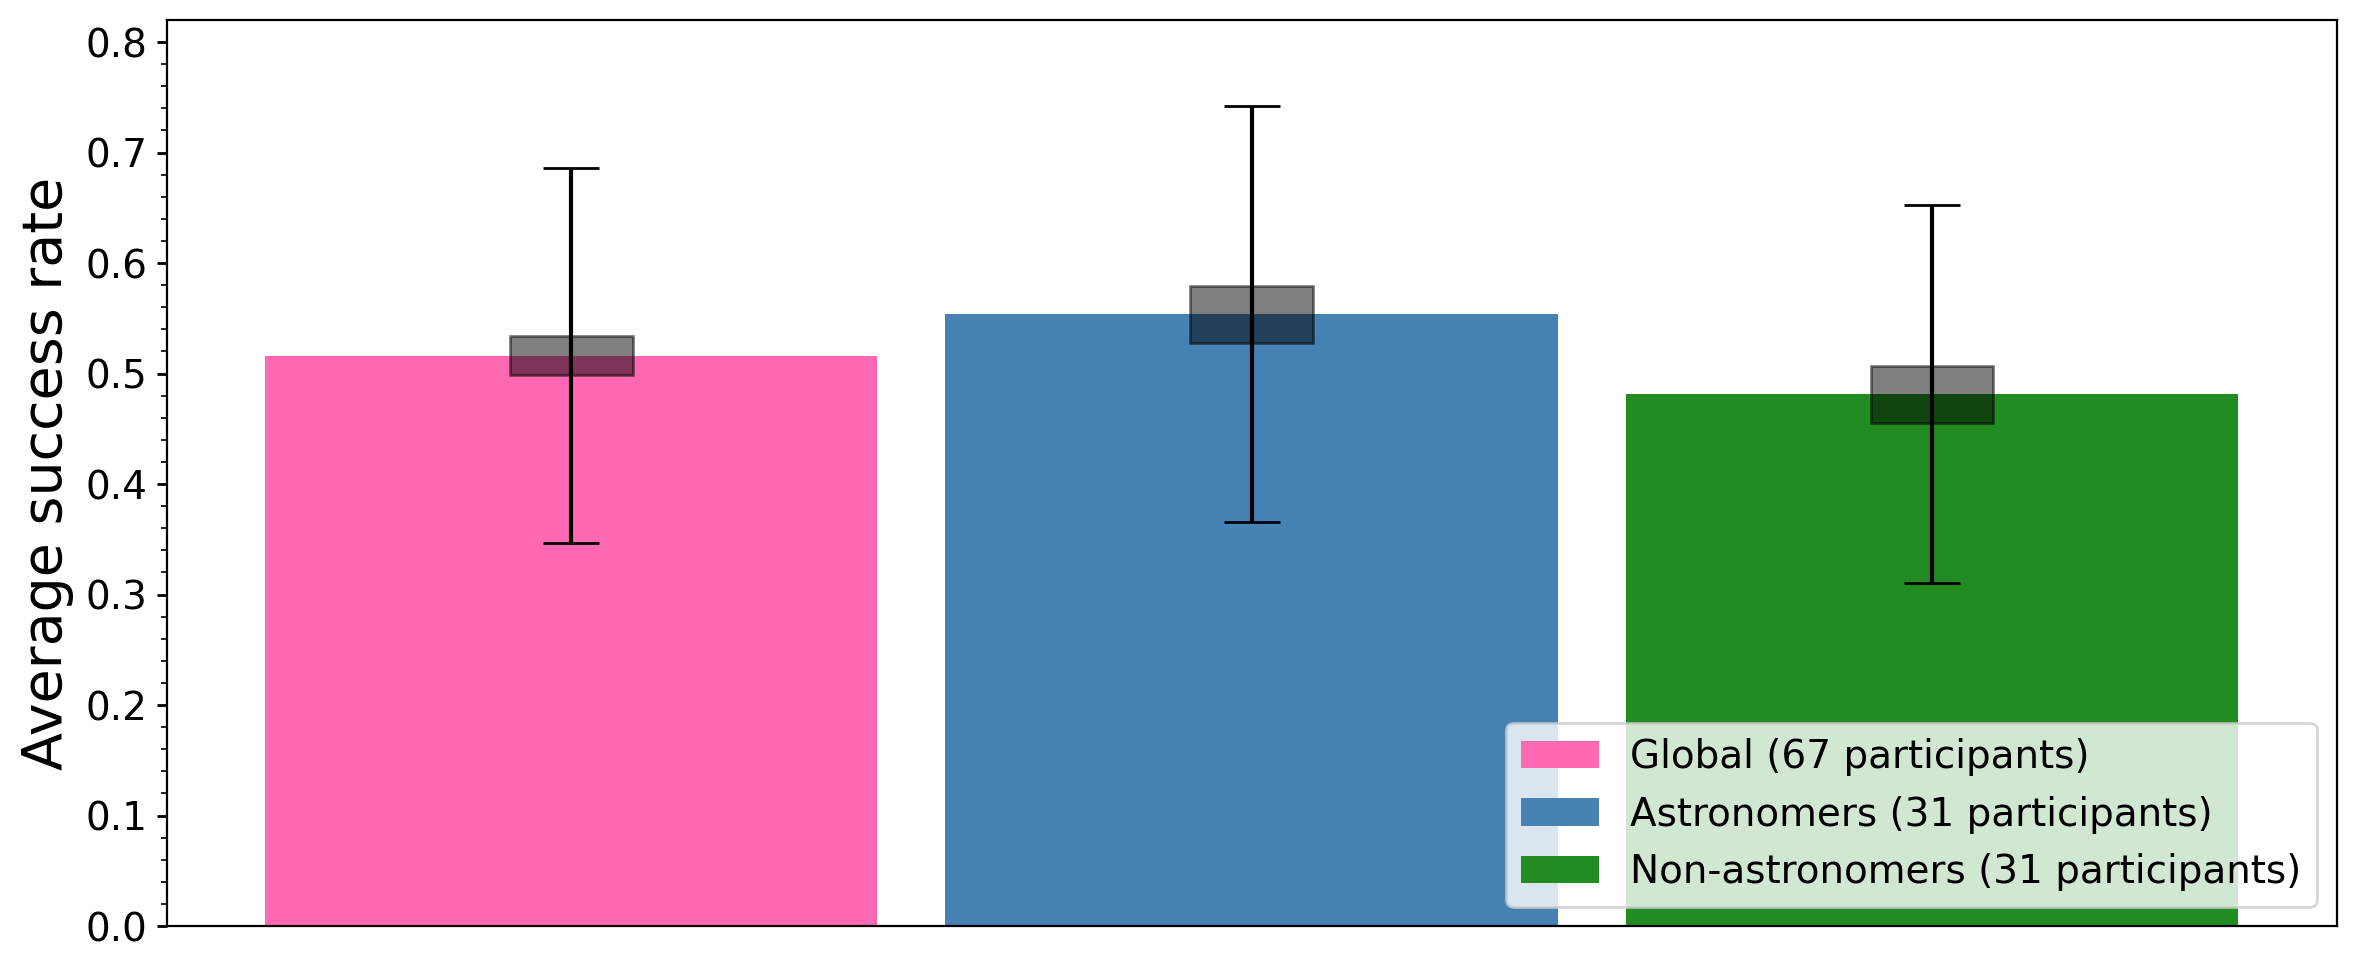

In [104]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, means[0] , bar_width, yerr=data['std'][0], 
                label=labels[0] + " (" + str(participants[0]) + " participants)",color='hotpink', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, means[1] , bar_width, yerr=data['std'][1], 
                label=labels[1] + " (" + str(participants[1]) + " participants)", color='steelblue', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, means[2] , bar_width, yerr=data['std'][2], 
                label=labels[2] + " (" + str(participants[2]) + " participants)", color = 'forestgreen', align='center',ecolor='black',capsize=10)

ax.set_ylabel('Average success rate',size=20)
ax.tick_params(which='major', width=1.0, labelsize=14)
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.add_patch(Rectangle((0.46, data['Jeff_low'][0]), 
                       0.18, data['Jeff_high'][0]-data['Jeff_low'][0],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.46, data['Jeff_low'][1]), 
                       0.18, data['Jeff_high'][1]-data['Jeff_low'][1],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['Jeff_low'][2]), 
                       0.18, data['Jeff_high'][2]-data['Jeff_low'][2],
                       alpha=0.5,color='black'))
ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=14,loc='lower right')
ax.set_ylim(0, 0.82)

plt.savefig('ViewCube_plot1.png')
plt.show()

In [105]:
participants = data['Participants']
participants

0    67
1    31
2    31
3    11
4    13
5    11
6    12
Name: Participants, dtype: int64

In [106]:
comb_means = data['comb_Success']
comb_means

0    0.156716
1    0.145161
2    0.193548
3    0.136364
4    0.115385
5    0.363636
6    0.208333
Name: comb_Success, dtype: float64

## Combined questions

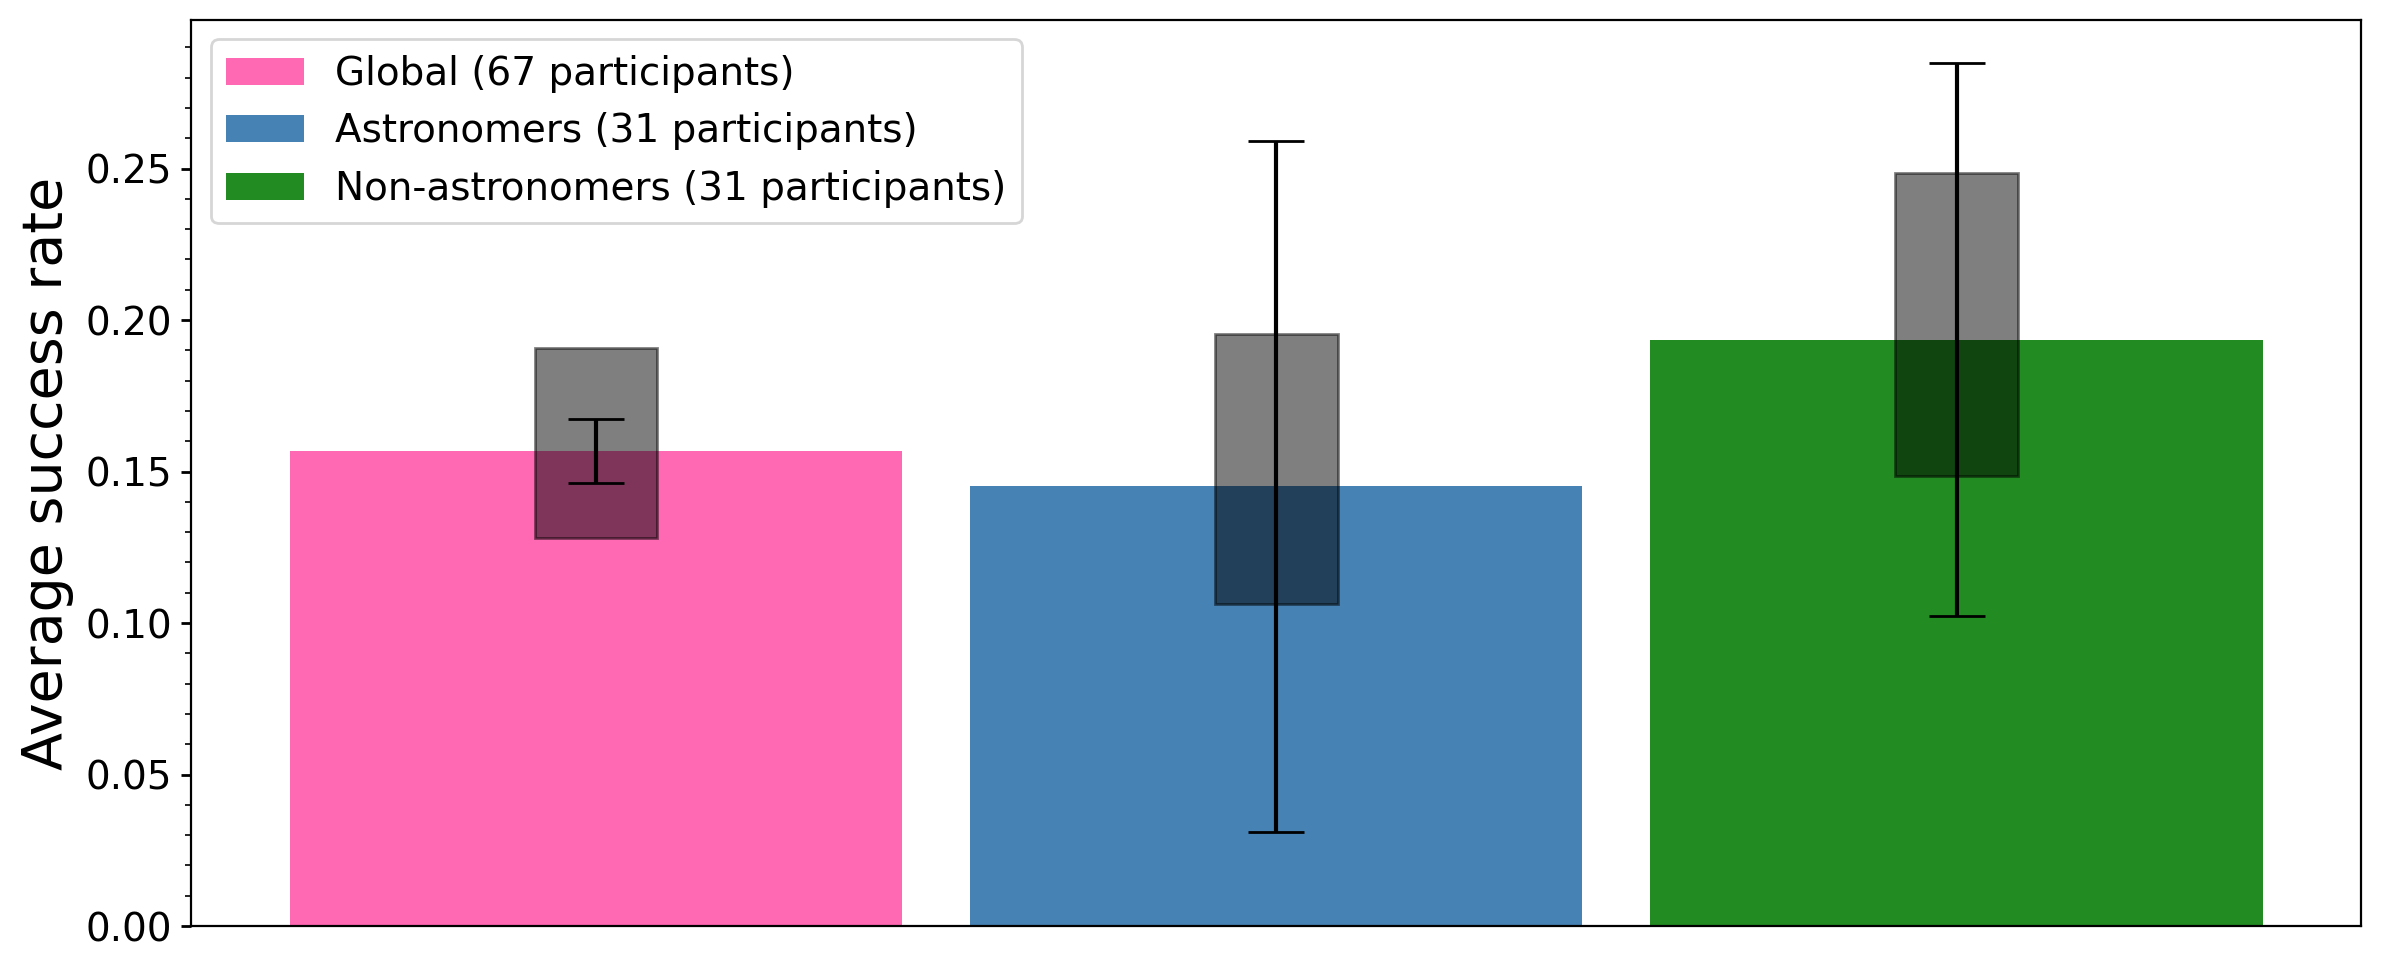

In [107]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, comb_means[0] , bar_width, yerr=data['comb_std'][0], 
                label=labels[0] + " (" + str(participants[0]) + " participants)",color='hotpink', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, comb_means[1] , bar_width, yerr=data['comb_std'][1], 
                label=labels[1] + " (" + str(participants[1]) + " participants)", color='steelblue', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, comb_means[2] , bar_width, yerr=data['comb_std'][2], 
                label=labels[2] + " (" + str(participants[2]) + " participants)", color = 'forestgreen', align='center',ecolor='black',capsize=10)

ax.set_ylabel('Average success rate',size=20)
ax.tick_params(which='major', width=1.0, labelsize=14)
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.add_patch(Rectangle((0.46, data['comb_Jeff_low'][0]), 
                       0.18, data['comb_Jeff_high'][0]-data['comb_Jeff_low'][0],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((1.46, data['comb_Jeff_low'][1]), 
                       0.18, data['comb_Jeff_high'][1]-data['comb_Jeff_low'][1],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['comb_Jeff_low'][2]), 
                       0.18, data['comb_Jeff_high'][2]-data['comb_Jeff_low'][2],
                       alpha=0.5,color='black'))


ax.set_xticks([])
ax.set_xticklabels([])

ax.legend(fontsize=14,loc='upper left')
plt.savefig('ViewCube_plot2.png')
plt.show()

## Subgroups: Astronomers musicians | Astronomers non musicians | Musicians non astronomers | Non musicians non astronomers

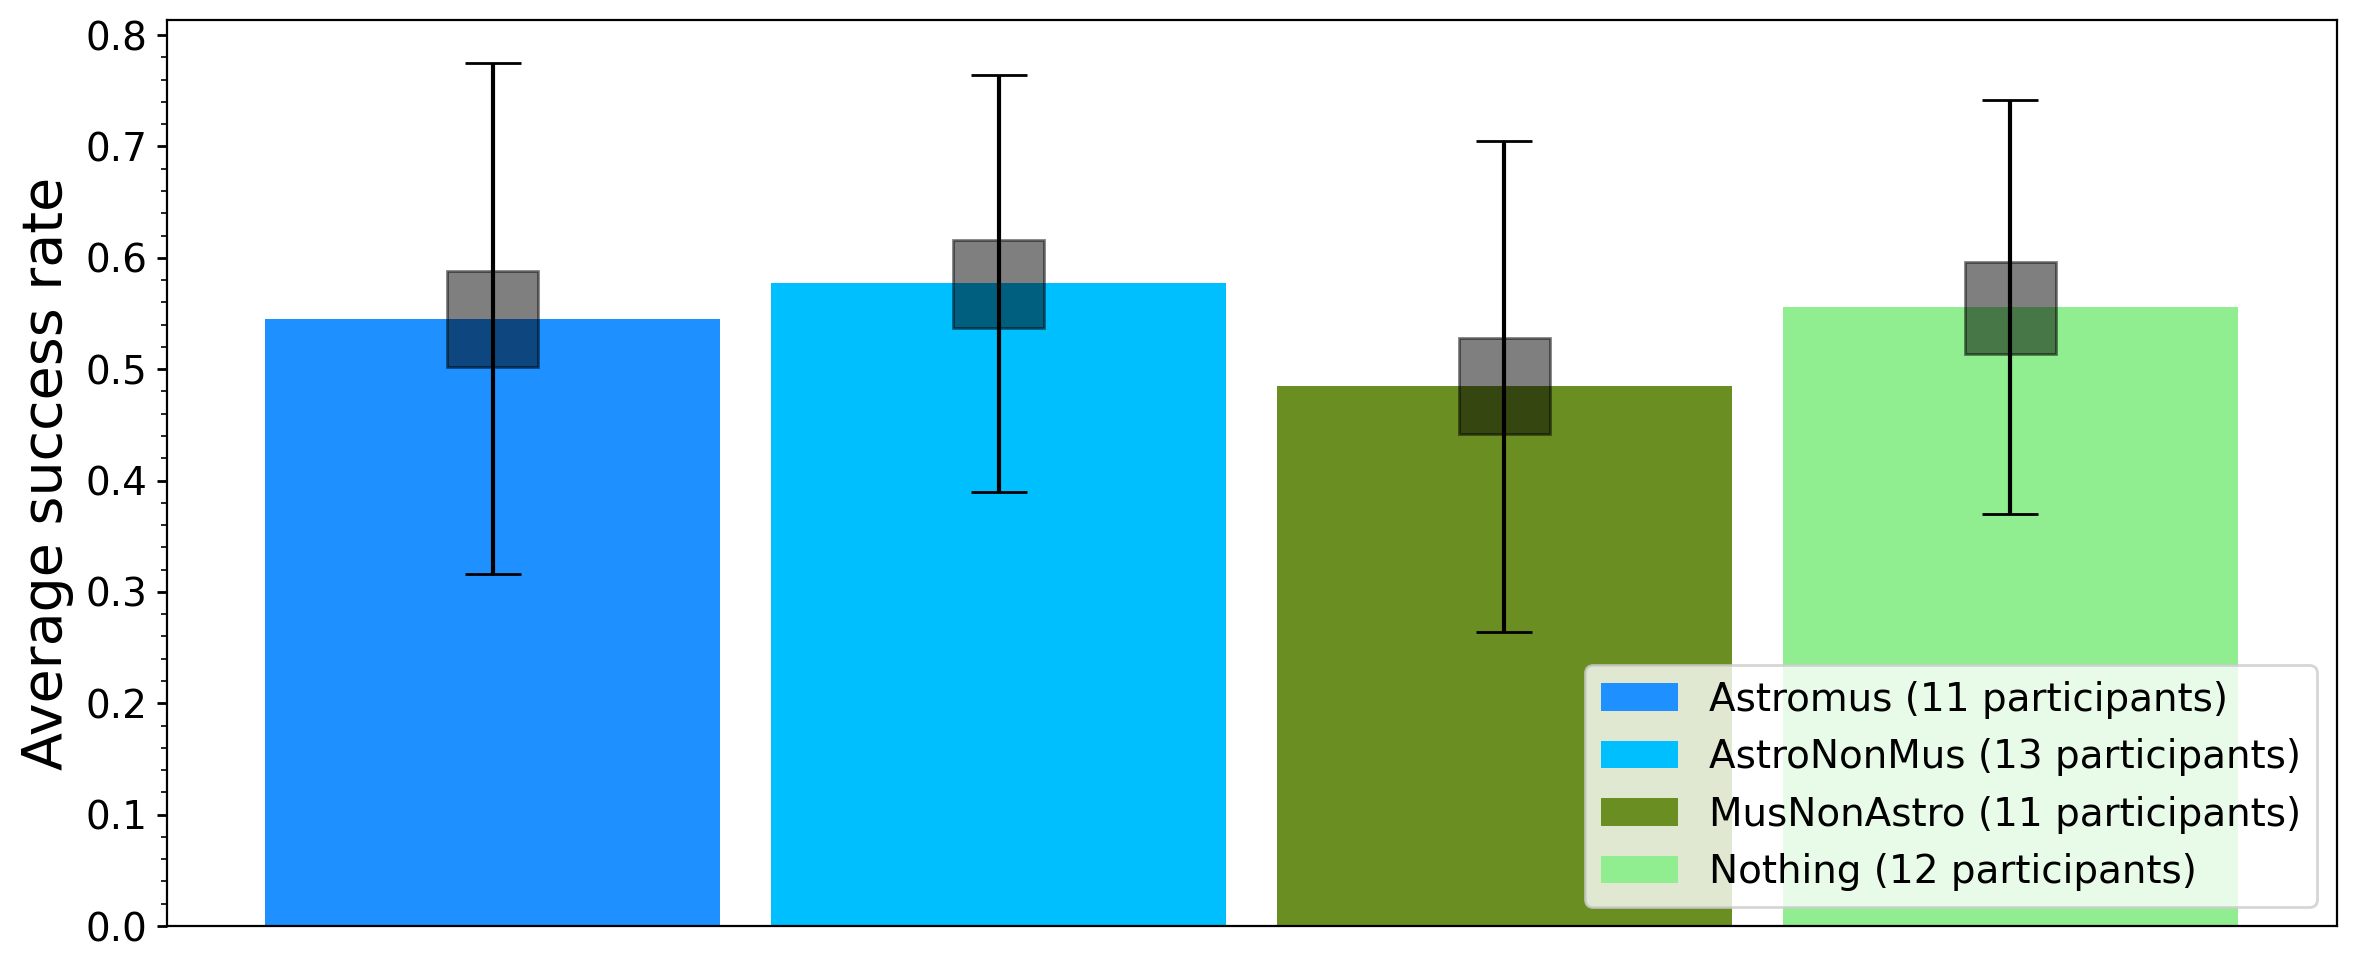

In [108]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, means[3] , bar_width, yerr=data['std'][3], 
                label=labels[3] + " (" + str(participants[3]) + " participants)",color='dodgerblue', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, means[4] , bar_width, yerr=data['std'][4], 
                label=labels[4] + " (" + str(participants[4]) + " participants)", color='deepskyblue', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, means[5] , bar_width, yerr=data['std'][5], 
                label=labels[5] + " (" + str(participants[5]) + " participants)", color = 'olivedrab', align='center',ecolor='black',capsize=10)
rects4 = ax.bar(4 - bar_width/2, means[6] , bar_width, yerr=data['std'][6], 
                label=labels[6] + " (" + str(participants[6]) + " participants)", color = 'lightgreen', align='center',ecolor='black',capsize=10)


ax.set_ylabel('Average success rate',size=20)
ax.tick_params(which='major', width=1.0, labelsize=14)
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.add_patch(Rectangle((0.46, data['Jeff_low'][3]), 
                       0.18, data['Jeff_high'][3]-data['Jeff_low'][3],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((1.46, data['Jeff_low'][4]), 
                       0.18, data['Jeff_high'][4]-data['Jeff_low'][4],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['Jeff_low'][5]), 
                       0.18, data['Jeff_high'][5]-data['Jeff_low'][5],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((3.46, data['Jeff_low'][6]), 
                       0.18, data['Jeff_high'][6]-data['Jeff_low'][6],
                       alpha=0.5,color='black'))

ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=14,loc='lower right')
plt.savefig('ViewCube_plot3.png')
plt.show()

In [109]:
comb_means = data['comb_Success']
comb_means

0    0.156716
1    0.145161
2    0.193548
3    0.136364
4    0.115385
5    0.363636
6    0.208333
Name: comb_Success, dtype: float64

## Results summary

In [110]:
graph1 = [glob.describe(), experts.describe(), nonExperts.describe()]
graph2 = [glob_comb.describe(), experts_combined.describe(), nonExperts_combined.describe()]

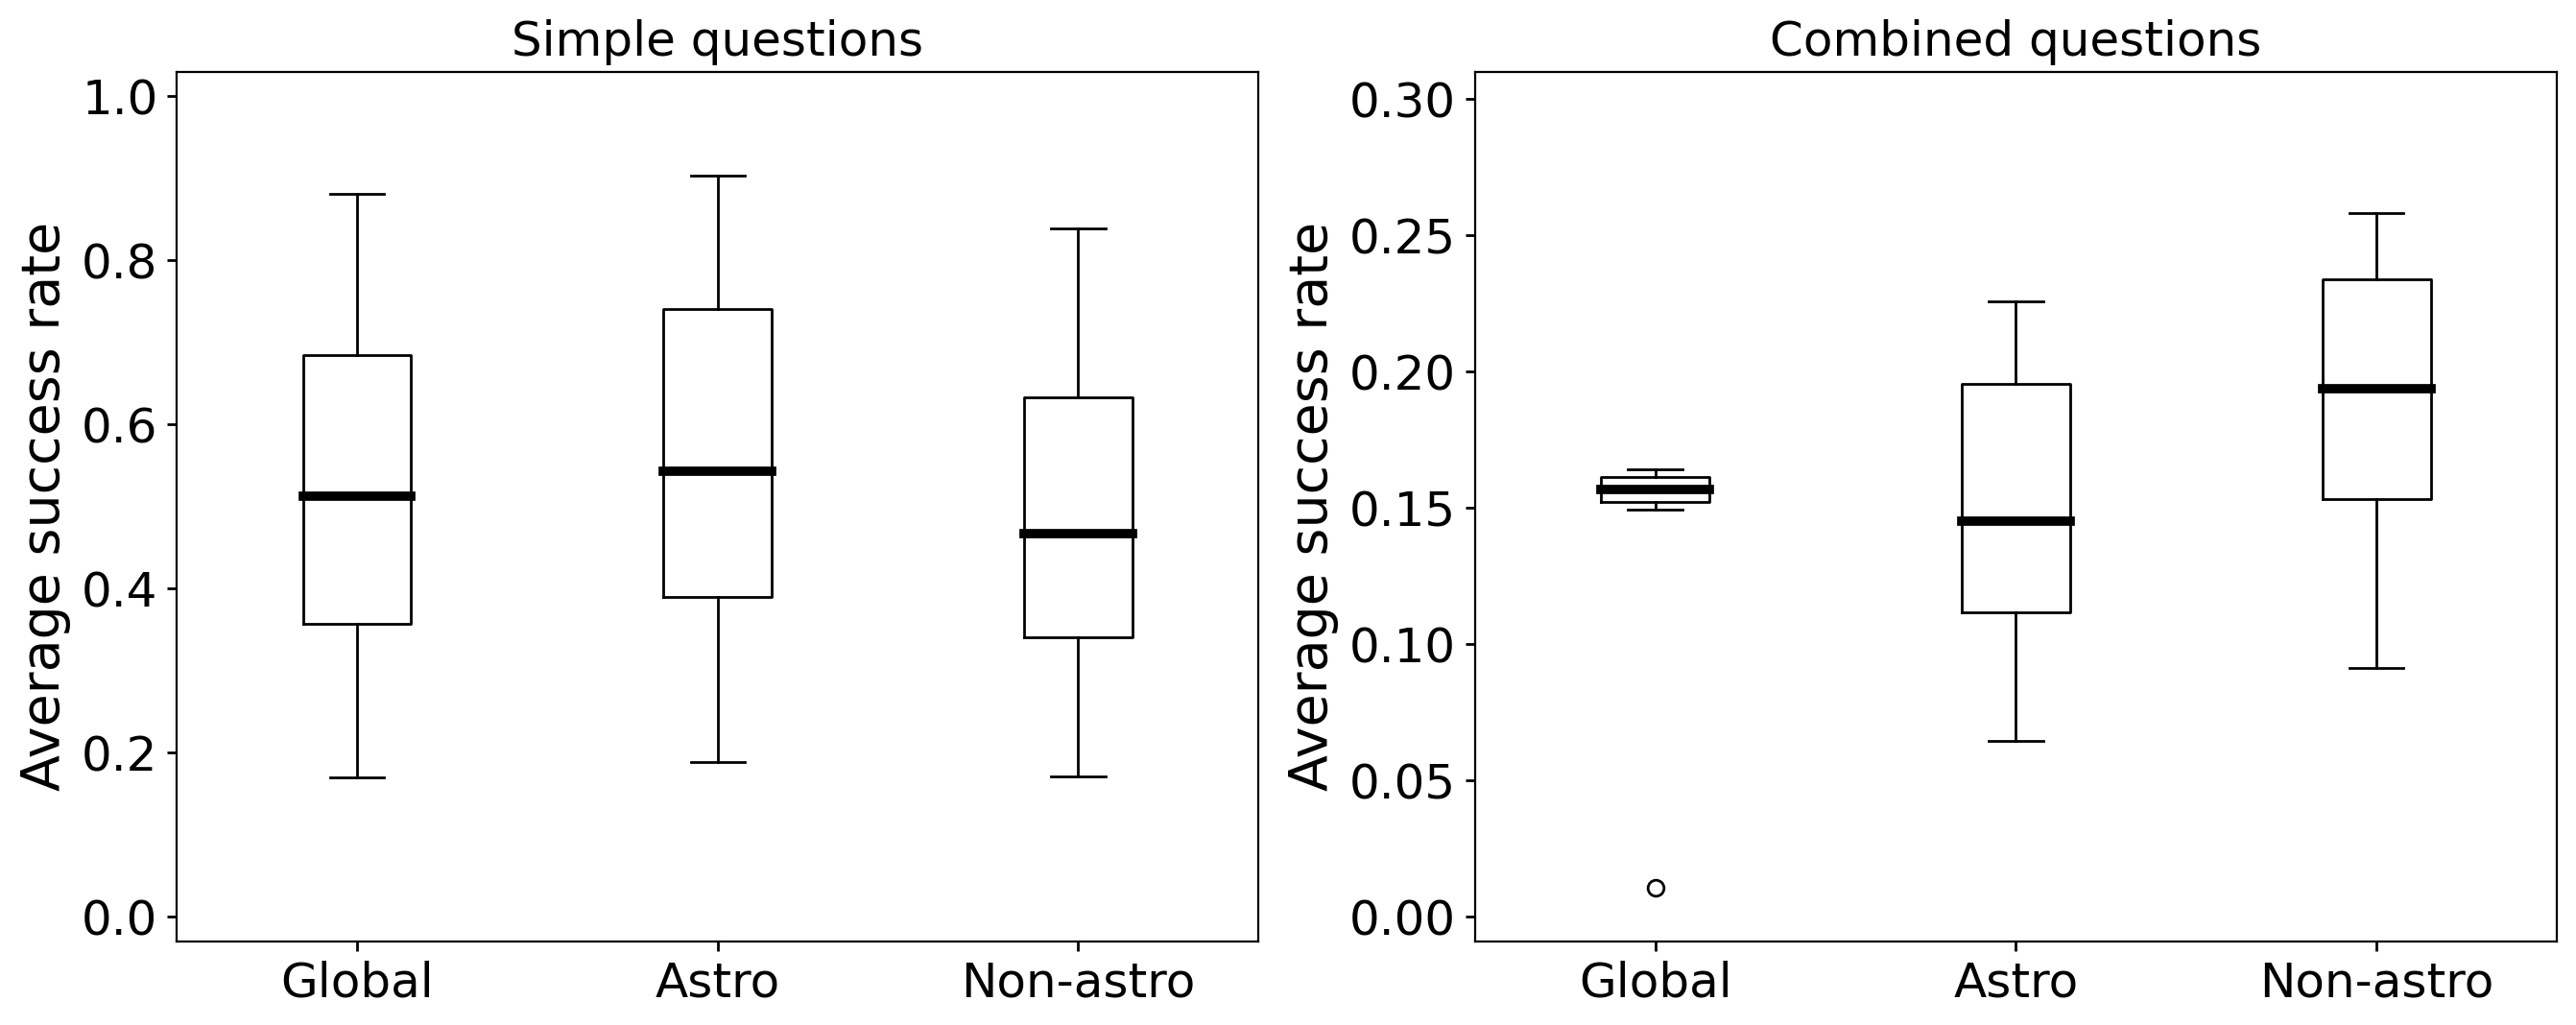

In [111]:
medianprops = dict(linestyle='-', linewidth=3.5, color='black')

labels_1 = ["Global", "Astro", "Non-astro"]
fig, ax = plt.subplots(1, 2, figsize=(16,6), dpi=200)
ax[0].boxplot(graph1, '', medianprops=medianprops)
#ax[0].boxplot(graph1, 0, '')
ax[0].set_xticklabels(labels_1, fontsize=20)
ax[0].tick_params(which='major', width=1.0, labelsize=18)
ax[0].set_title("Simple questions", size=18)
ax[0].set_ylim(-0.03, 1.03)

ax[0].set_ylabel('Average success rate',size=20)


ax[1].boxplot(graph2, '', medianprops=medianprops)
ax[1].set_xticklabels(labels_1, fontsize=20)
ax[1].tick_params(which='major', width=1.0, labelsize=18)
ax[1].set_title("Combined questions", size=18)
ax[1].set_ylim(-0.009, 0.31)

ax[1].set_ylabel('Average success rate',size=20)


plt.savefig('ViewCube_boxplot1.png')

plt.show()

In [112]:
graph3 = [astromus.describe(), astro_nonmus.describe(), non_exp_mus.describe(), nothing.describe()]
graph4 = [astromus_combined.describe(), astro_nonmus_combined.describe(), non_exp_mus.describe(), nothing_combined.describe()]

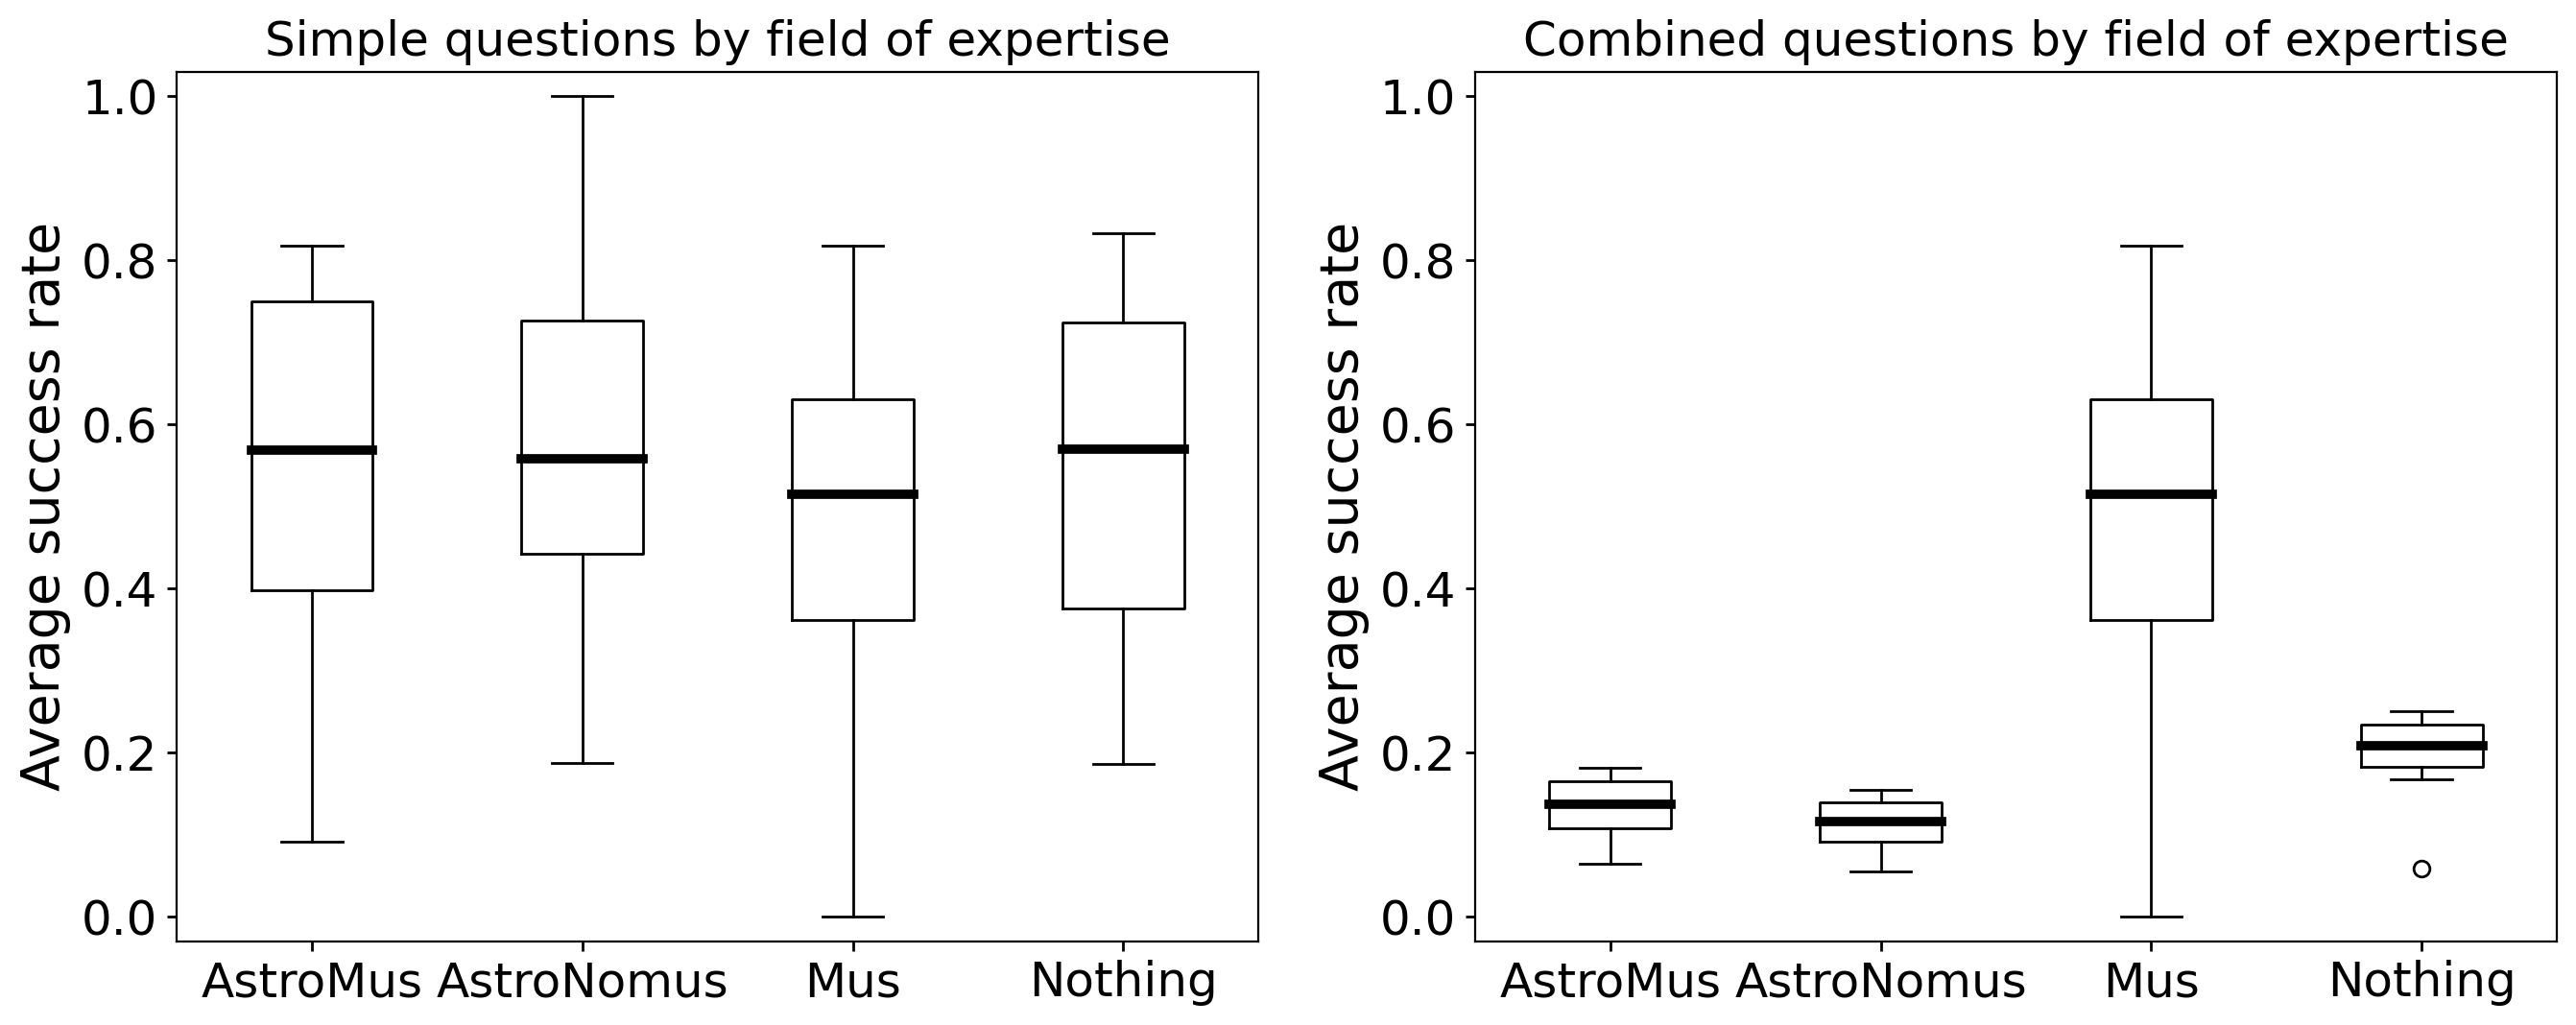

In [113]:
labels_2 = ["AstroMus", "AstroNomus", "Mus", "Nothing"]
fig, ax = plt.subplots(1, 2, figsize=(16,6), dpi=200)
ax[0].boxplot(graph3, '', medianprops=medianprops)
ax[0].set_xticklabels(labels_2, fontsize=20)
ax[0].tick_params(which='major', width=1.0, labelsize=18)
ax[0].set_title("Simple questions by field of expertise", size=18)
ax[0].set_ylim(-0.03, 1.03)
ax[0].set_ylabel('Average success rate',size=20)


ax[1].boxplot(graph4, '', medianprops=medianprops)
ax[1].set_xticklabels(labels_2, fontsize=12)
ax[1].tick_params(which='major', width=1.0, labelsize=18)
ax[1].set_title("Combined questions by field of expertise", size=18)
ax[1].set_ylim(-0.03, 1.03)
ax[1].set_ylabel('Average success rate',size=20)



plt.savefig('ViewCube_boxplot2.png')

plt.show()

## Global qualitative answers

## Subgroups - Combined questions (Not used)

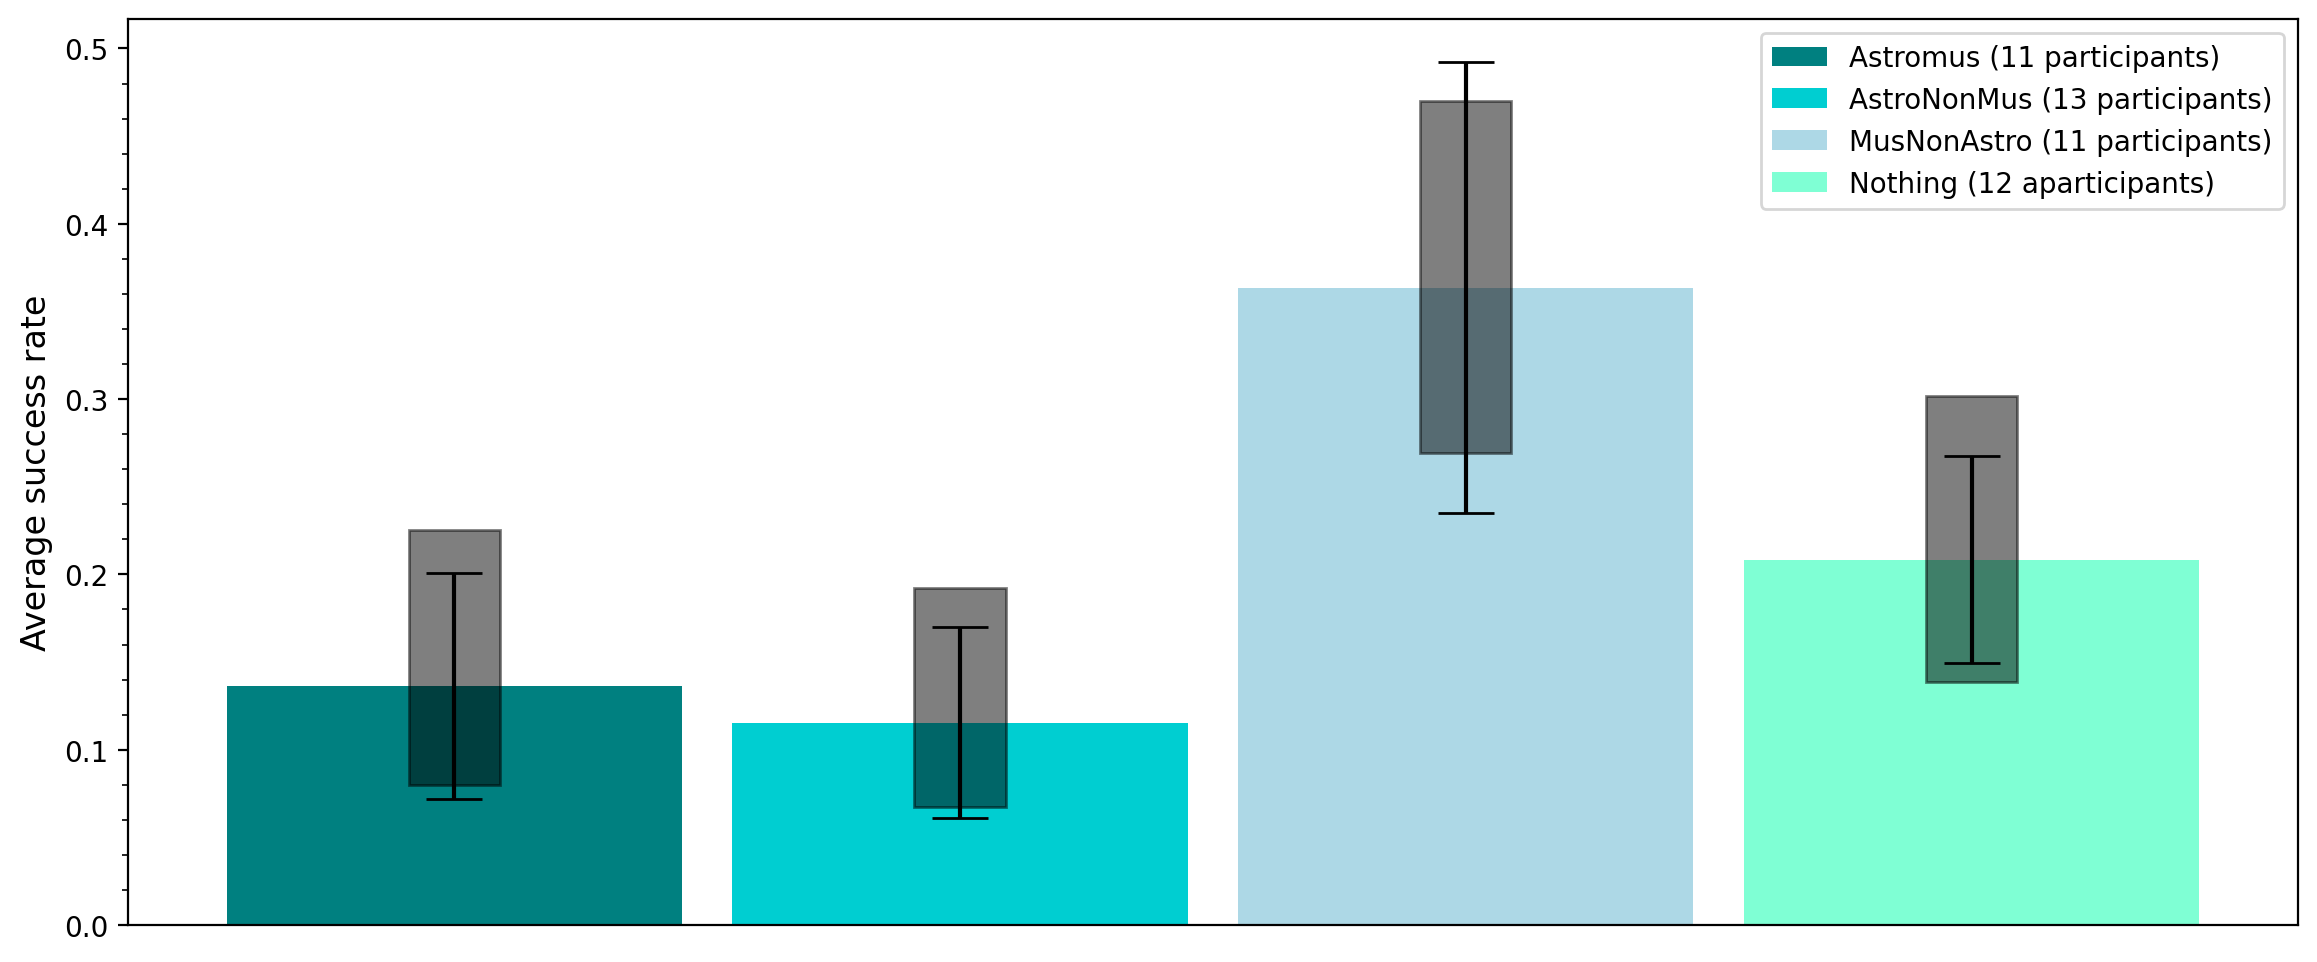

In [114]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, comb_means[3] , bar_width, yerr=data['comb_std'][3], 
                label=labels[3] + " (" + str(participants[3]) + " participants)",color='teal', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, comb_means[4] , bar_width, yerr=data['comb_std'][4], 
                label=labels[4] + " (" + str(participants[4]) + " participants)", color='darkturquoise', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, comb_means[5] , bar_width, yerr=data['comb_std'][5], 
                label=labels[5] + " (" + str(participants[5]) + " participants)", color = 'lightblue', align='center',ecolor='black',capsize=10)
rects4 = ax.bar(4 - bar_width/2, comb_means[6] , bar_width, yerr=data['comb_std'][6], 
                label=labels[6] + " (" + str(participants[6]) + " aparticipants)", color = 'aquamarine', align='center',ecolor='black',capsize=10)


ax.set_ylabel('Average success rate',size=12)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.add_patch(Rectangle((0.46, data['comb_Jeff_low'][3]), 
                       0.18, data['comb_Jeff_high'][3]-data['comb_Jeff_low'][3],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((1.46, data['comb_Jeff_low'][4]), 
                       0.18, data['comb_Jeff_high'][4]-data['comb_Jeff_low'][4],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['comb_Jeff_low'][5]), 
                       0.18, data['comb_Jeff_high'][5]-data['comb_Jeff_low'][5],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((3.46, data['comb_Jeff_low'][6]), 
                       0.18, data['comb_Jeff_high'][6]-data['comb_Jeff_low'][6],
                       alpha=0.5,color='black'))

ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=10,loc='upper right')
plt.savefig('ViewCube_plot4.png')
plt.show()

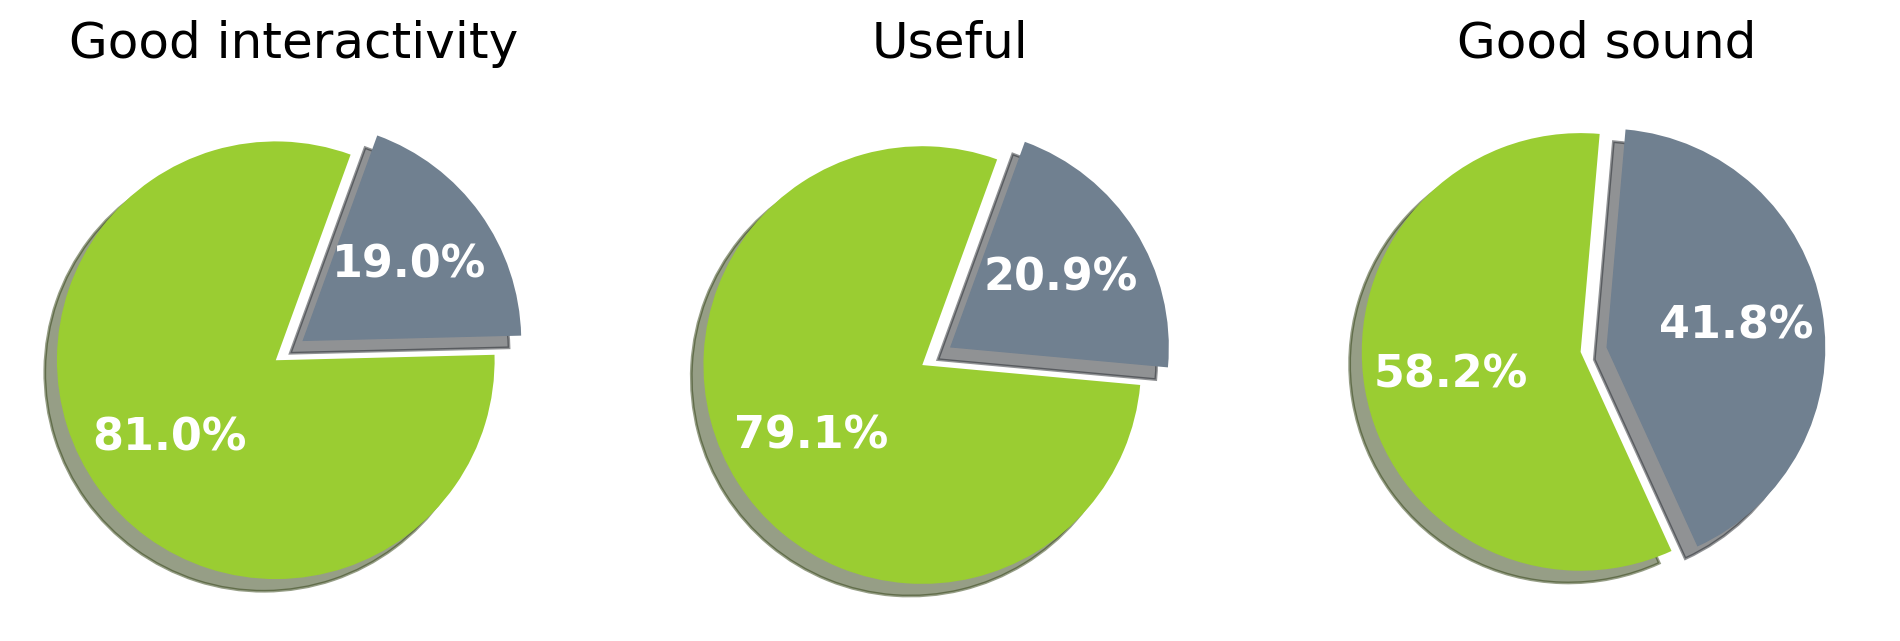

In [115]:
qualitative_labels = 'Yes', 'No'
interactivity = [data['interactivity'][0], 100-data['interactivity'][0]]
usefulness = [data['useful'][0], 100-data['useful'][0]]
sound = [data['sound'][0], 100-data['sound'][0]]


explode = (0.15, 0)
explode2 = (0.1, 0.05)
explode3 = (0.12, 0)


fig, ax = plt.subplots(1, 3, figsize=(12, 8), dpi=200)
ax[0].pie(interactivity, explode=explode2, shadow= True, autopct='%1.1f%%', startangle=70, textprops=dict(color="w", size=16, weight="bold"), colors=['yellowgreen', 'slategrey'])
ax[0].set_title("Good interactivity", size=18)

ax[1].pie(usefulness, explode=explode, shadow= True, autopct='%1.1f%%', startangle=70, textprops=dict(color="w", size=16, weight="bold"), colors=['yellowgreen', 'slategrey'])
ax[1].set_title("Useful", size=18)
ax[2].pie(sound, explode=explode3, shadow= True, autopct='%1.1f%%', startangle=85, textprops=dict(color="w", size=16, weight="bold"), colors=['yellowgreen', 'slategrey'])
ax[2].set_title("Good sound", size=18)



plt.savefig('ViewCube_qualitative.png')
plt.show()

## Analysis by question

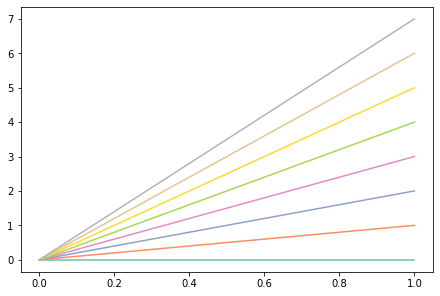

In [116]:
colors = plt.colormaps['Set2'].colors

fig, ax = plt.subplots(layout='constrained')

for i, color in enumerate(colors):
    ax.plot([0, i], color=color)

plt.show()

In [117]:
data['useful'][0]

79.1044776119403

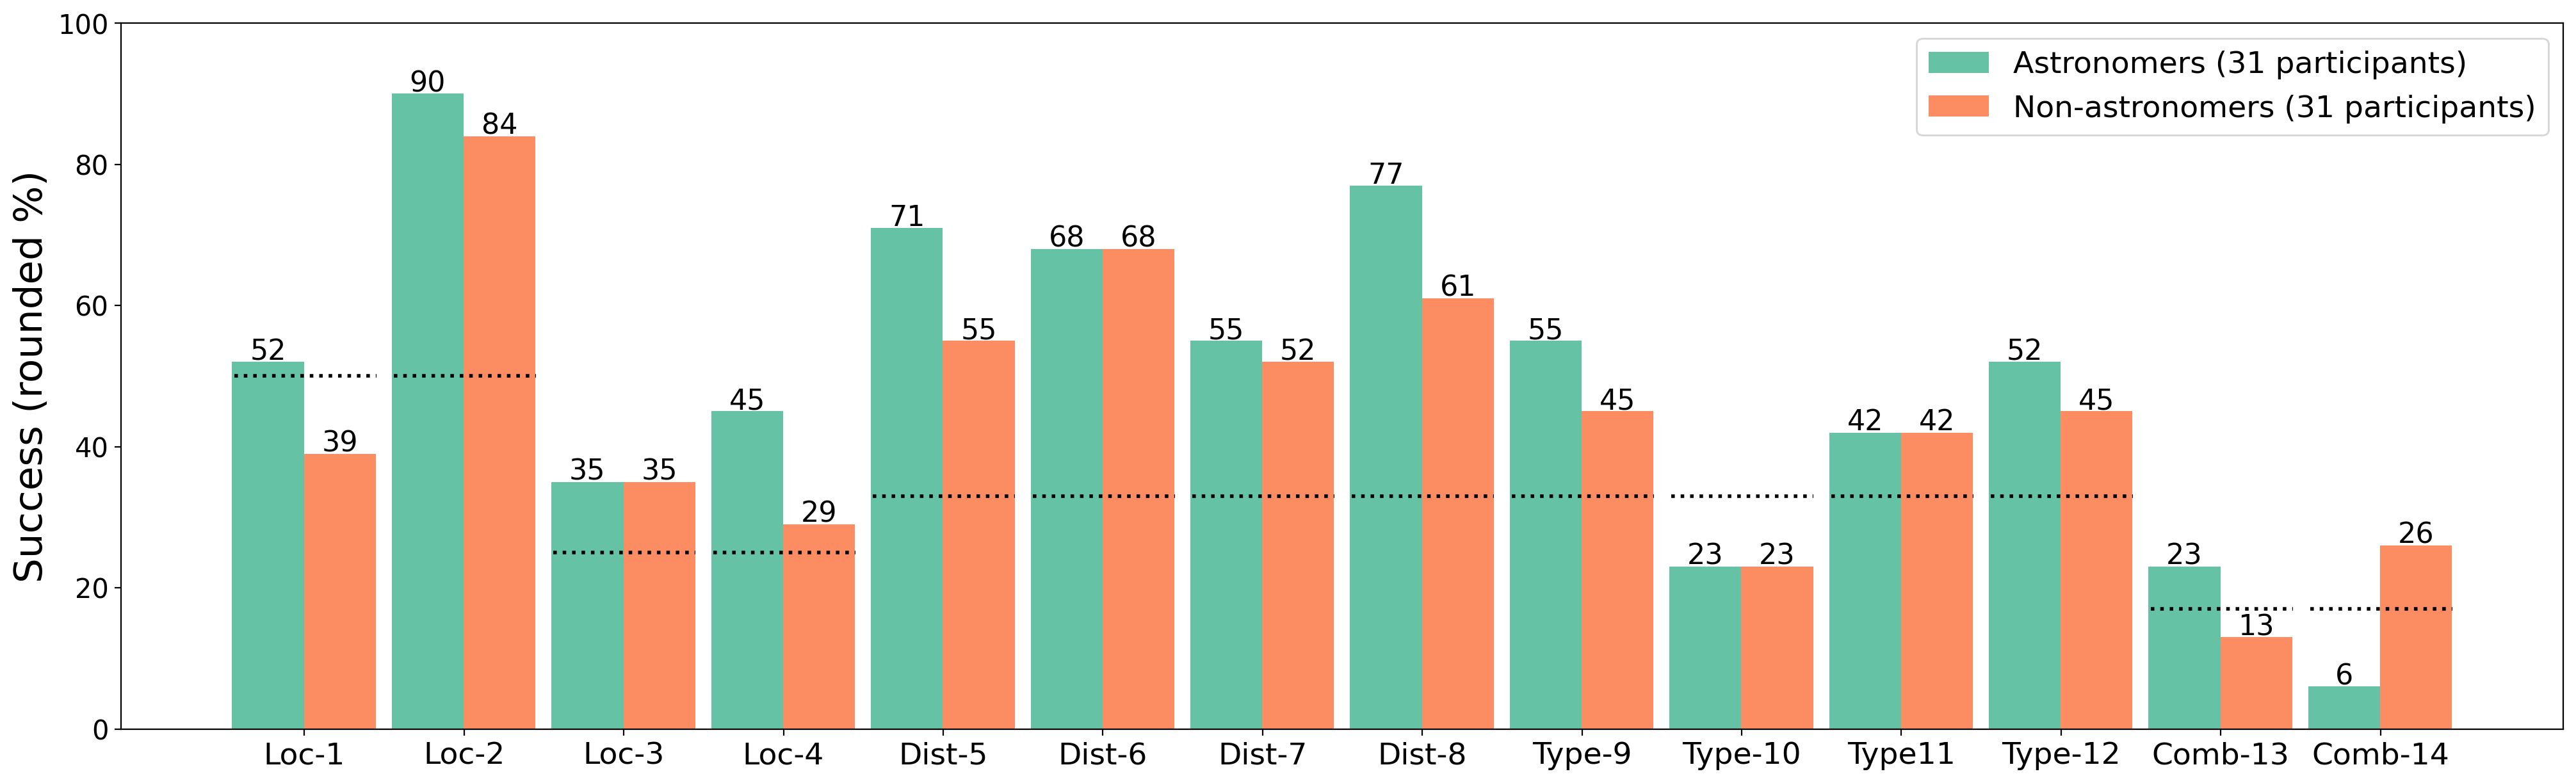

In [118]:
plt.rc('ytick', labelsize=15) 

questions = ("Loc-1", "Loc-2", "Loc-3", "Loc-4", "Dist-5", "Dist-6", "Dist-7", "Dist-8", "Type-9", "Type-10","Type11", "Type-12", "Comb-13", "Comb-14")
success = {
    'Astronomers (31 participants)': np.concatenate((np.round(100*experts_correct/experts_total_responses), np.round(100*experts_combined_correct/experts_total_responses))),
    'Non-astronomers (31 participants)': np.concatenate((np.round(100*nonExperts_correct/nonExperts_total_responses), np.round(100*nonExperts_combined_correct/nonExperts_total_responses))),
}

x = np.arange(len(questions))  # the label locations
width = 0.45  # the width of the bars
multiplier = 1.05
fig, ax = plt.subplots(figsize=(20,6),dpi=200, layout='constrained')

i=0
for attribute, measurement in success.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[i])
    ax.bar_label(rects, padding=-2, fontsize=16)
    multiplier += 1
    i += 1
    
line_offset = 0.33    
ax.hlines(y=50, color='black', linestyle=':', linewidth=2, xmin=-.07+line_offset, xmax=.82+line_offset)
ax.hlines(y=50, color='black', linestyle=':', linewidth=2, xmin=0.93+line_offset, xmax=1.82+line_offset)
ax.hlines(y=25, color='black', linestyle=':', linewidth=2, xmin=1.93+line_offset, xmax=2.82+line_offset)
ax.hlines(y=25, color='black', linestyle=':', linewidth=2, xmin=2.93+line_offset, xmax=3.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=3.93+line_offset, xmax=4.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=4.93+line_offset, xmax=5.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=5.93+line_offset, xmax=6.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=6.93+line_offset, xmax=7.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=7.93+line_offset, xmax=8.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=8.93+line_offset, xmax=9.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=9.93+line_offset, xmax=10.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=10.93+line_offset, xmax=11.82+line_offset)
ax.hlines(y=17, color='black', linestyle=':', linewidth=2, xmin=11.93+line_offset, xmax=12.82+line_offset)
ax.hlines(y=17, color='black', linestyle=':', linewidth=2, xmin=12.93+line_offset, xmax=13.82+line_offset)

    
ax.set_ylabel('Success (rounded %)', fontsize=22)
ax.set_xticks(.25 + x + width, questions, fontsize=17)
ax.legend(loc='upper right', ncols=1, fontsize=17)
ax.set_ylim(0, 100)



plt.savefig('ViewCube_questions_subgroups1.png')
plt.show()

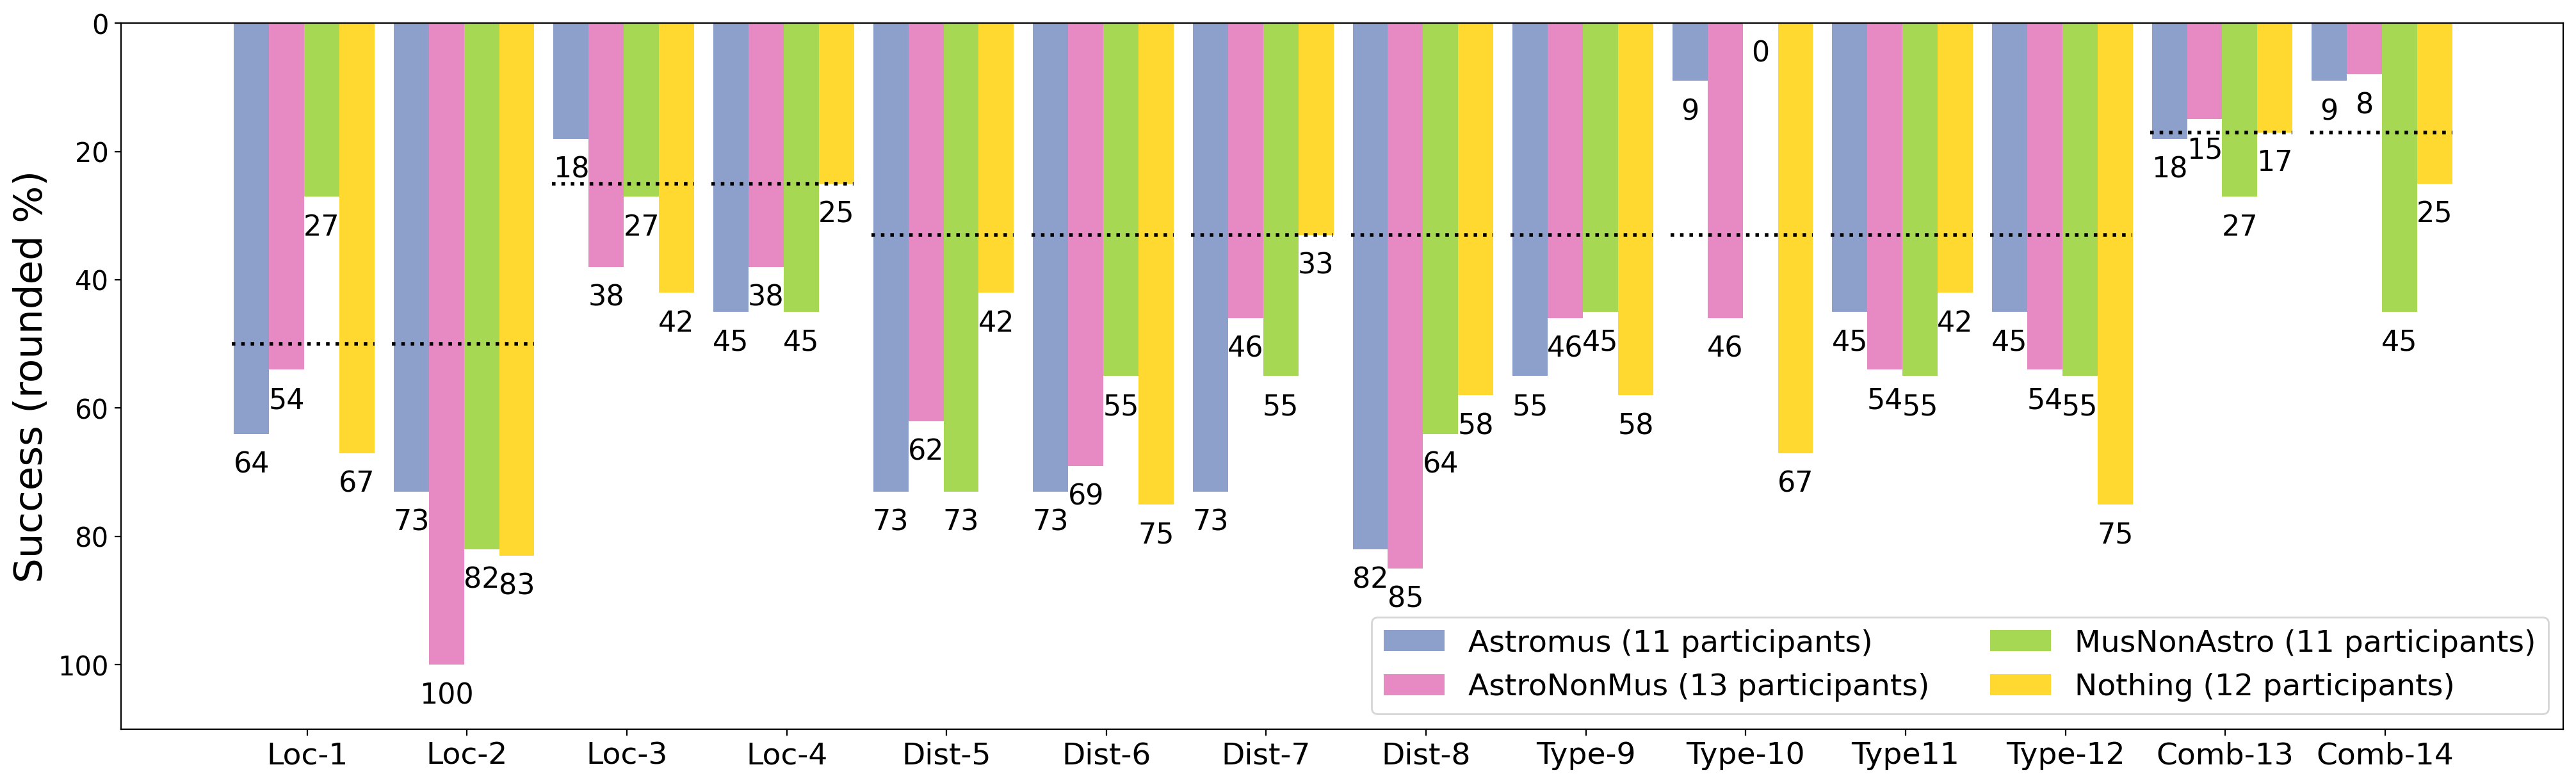

In [119]:
plt.style.use('fast')

questions = ("Loc-1", "Loc-2", "Loc-3", "Loc-4", "Dist-5", "Dist-6", "Dist-7", "Dist-8", "Type-9", "Type-10","Type11", "Type-12", "Comb-13", "Comb-14")
success2 = {
   'Astromus (11 participants)': np.concatenate((np.round(100*astromus_correct/astromus_total_responses), np.round(100*astromus_combined_correct/astromus_total_responses))),
    'AstroNonMus (13 participants)': np.concatenate((np.round(100*astro_nonmus_correct/astro_nonmus_total_responses), np.round(100*astro_nonmus_combined_correct/astro_nonmus_total_responses))),
    'MusNonAstro (11 participants)': np.concatenate((np.round(100*non_exp_mus_correct/non_exp_mus_total_responses), np.round(100*non_exp_mus_combined_correct/non_exp_mus_total_responses))),
    'Nothing (12 participants)': np.concatenate((np.round(100*nothing_correct/nothing_total_responses), np.round(100*nothing_combined_correct/nothing_total_responses))),

}

x = np.arange(len(questions))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0.55
fig, ax = plt.subplots(figsize=(20,6),dpi=200, layout='constrained')
i=0
for attribute, measurement in success2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[i+2])
    ax.bar_label(rects, padding= -25, fontsize=16)
    multiplier += 1
    i += 1

line_offset = 0.07    
ax.hlines(y=50, color='black', linestyle=':', linewidth=2, xmin=-.07+line_offset, xmax=.82+line_offset)
ax.hlines(y=50, color='black', linestyle=':', linewidth=2, xmin=0.93+line_offset, xmax=1.82+line_offset)
ax.hlines(y=25, color='black', linestyle=':', linewidth=2, xmin=1.93+line_offset, xmax=2.82+line_offset)
ax.hlines(y=25, color='black', linestyle=':', linewidth=2, xmin=2.93+line_offset, xmax=3.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=3.93+line_offset, xmax=4.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=4.93+line_offset, xmax=5.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=5.93+line_offset, xmax=6.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=6.93+line_offset, xmax=7.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=7.93+line_offset, xmax=8.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=8.93+line_offset, xmax=9.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=9.93+line_offset, xmax=10.82+line_offset)
ax.hlines(y=33, color='black', linestyle=':', linewidth=2, xmin=10.93+line_offset, xmax=11.82+line_offset)
ax.hlines(y=17, color='black', linestyle=':', linewidth=2, xmin=11.93+line_offset, xmax=12.82+line_offset)
ax.hlines(y=17, color='black', linestyle=':', linewidth=2, xmin=12.93+line_offset, xmax=13.82+line_offset)

    
ax.set_ylabel('Success (rounded %)', fontsize=22)
ax.set_xticks(.25 + x + width, questions, fontsize=17)
ax.legend(loc='lower right', ncols=2, fontsize=17)
ax.set_ylim(110, 0)



plt.savefig('ViewCube_questions-subgroups2.png')
plt.show()